# Visualization Basics

## Basic Settings for Notebooks 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# this doubles image size, but we'll do it manually below
# %config InlineBackend.figure_format = 'retina'

import numpy as np

In [2]:
# %load snippets/matplot_setup.py
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 163

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 20, 12
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = False # True activates latex output in fonts!
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

„150dpi is generally considered the minimum standard for high quality photographic reproduction in books and magazines. Newspapers often use 85dpi and the effect is clear: individual dots are visible and some detail is lost. Billboards go as low as 45dpi, but you can’t tell because you’re typically viewing from very far away. Typical dot matrix printers are capable for 60 – 90dpi, inkjet printers 300 – 600dpi, and laser printers 600 – 1,800dpi.“ – https://en.99designs.de/blog/tips/ppi-vs-dpi-whats-the-difference/

In [3]:
# A4 prints
# figsize=(11.69, 8.27)
# plt.rcParams['figure.figsize'] = 11.69, 8.27
# A3 prints
# figsize=(16.53,11.69)
# plt.rcParams['figure.figsize'] = 16.53, 11.69

Find the dpi for your screen at: http://dpi.lv/

In [4]:
# Dell Ultra HD 4k P2715Q => dpi = 163
# mbp 13" => dpi = 113 

## General Tricks with Jupyter

As Data Scientists mainly work with Jupyter based notebooks if they are working with Python, it's worth the time to investigate visualization tricks.

In [5]:
!pip freeze | grep bokeh

bokeh==0.12.13


In [6]:
x, y = 5, 3
x
y

3

In [7]:
# Show all output values
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
x, y = 5, 3
x
y

5

3

Jupyter have a kind of meta-commands starting with the percent character. Some of these are useful for displaying information, such as writing formulas with latex.

In [9]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

In [10]:
%%latex
$$ x^3 + C = \int{\frac{1}{3} x^2 \; dx} \quad (C \in \mathbb{R})$$

<IPython.core.display.Latex object>

In [11]:
%%system
ls -laH
du -sh .

['total 4816',
 'drwxr-xr-x   7 uberwach  staff      224 Jul  6 10:07 .',
 'drwxr-xr-x  15 uberwach  staff      480 Jul  6 09:35 ..',
 'drwxr-xr-x   5 uberwach  staff      160 Jul  6 09:18 .ipynb_checkpoints',
 '-rw-r--r--   1 uberwach  staff   163119 Jul  5 01:02 Interactive Data Visualization for the Web.ipynb',
 '-rw-r--r--   1 uberwach  staff    27082 Jul  6 09:17 Visualization in Python.ipynb',
 '-rw-r--r--   1 uberwach  staff  2272814 Jul  6 10:07 Visualization_Python_Basics.ipynb',
 'drwxr-xr-x   3 uberwach  staff       96 Jul  5 18:51 snippets',
 '8.2M\t.']

In [12]:
InteractiveShell.ast_node_interactivity = "last"

## Matplotlib

Matplotlib is the standard plotting functionality for machine learners. The reason is that most of the example code available is written in matplotlib. Also, a few years ago Matlab was standard among machine learners and you still find reference code in research papers. We import again to reset the settings we've done.

/Users/uberwach/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


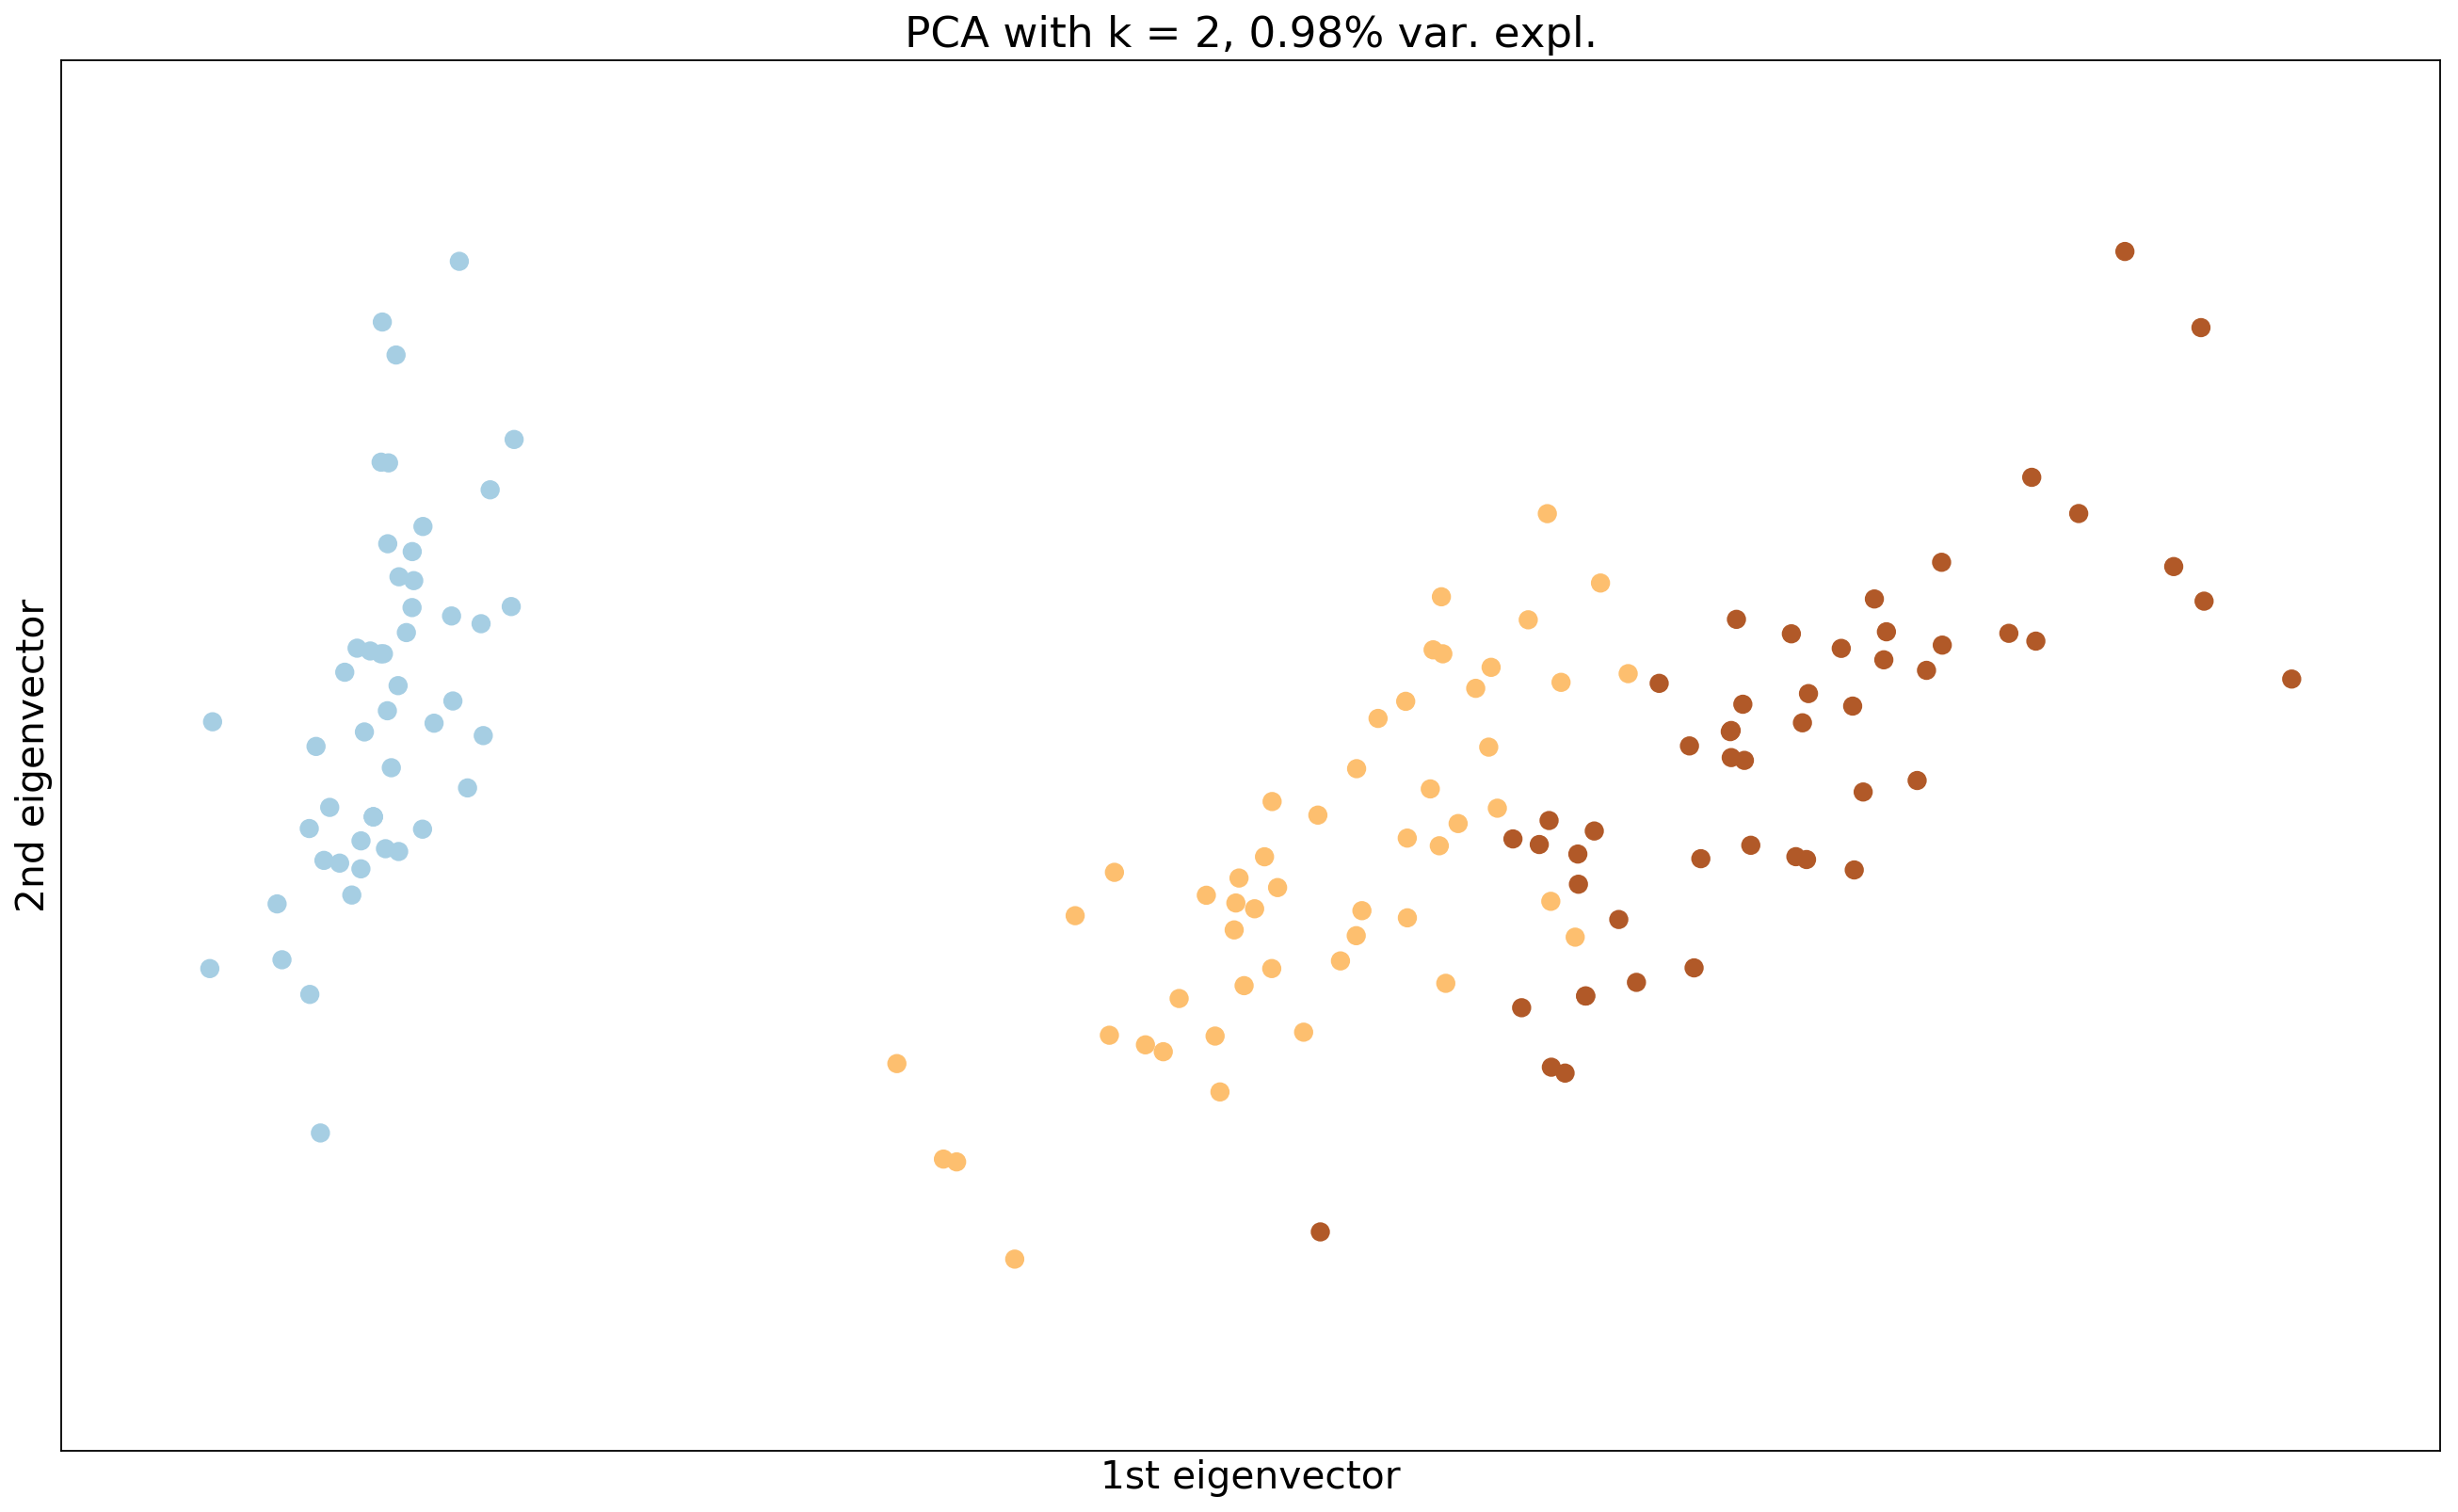

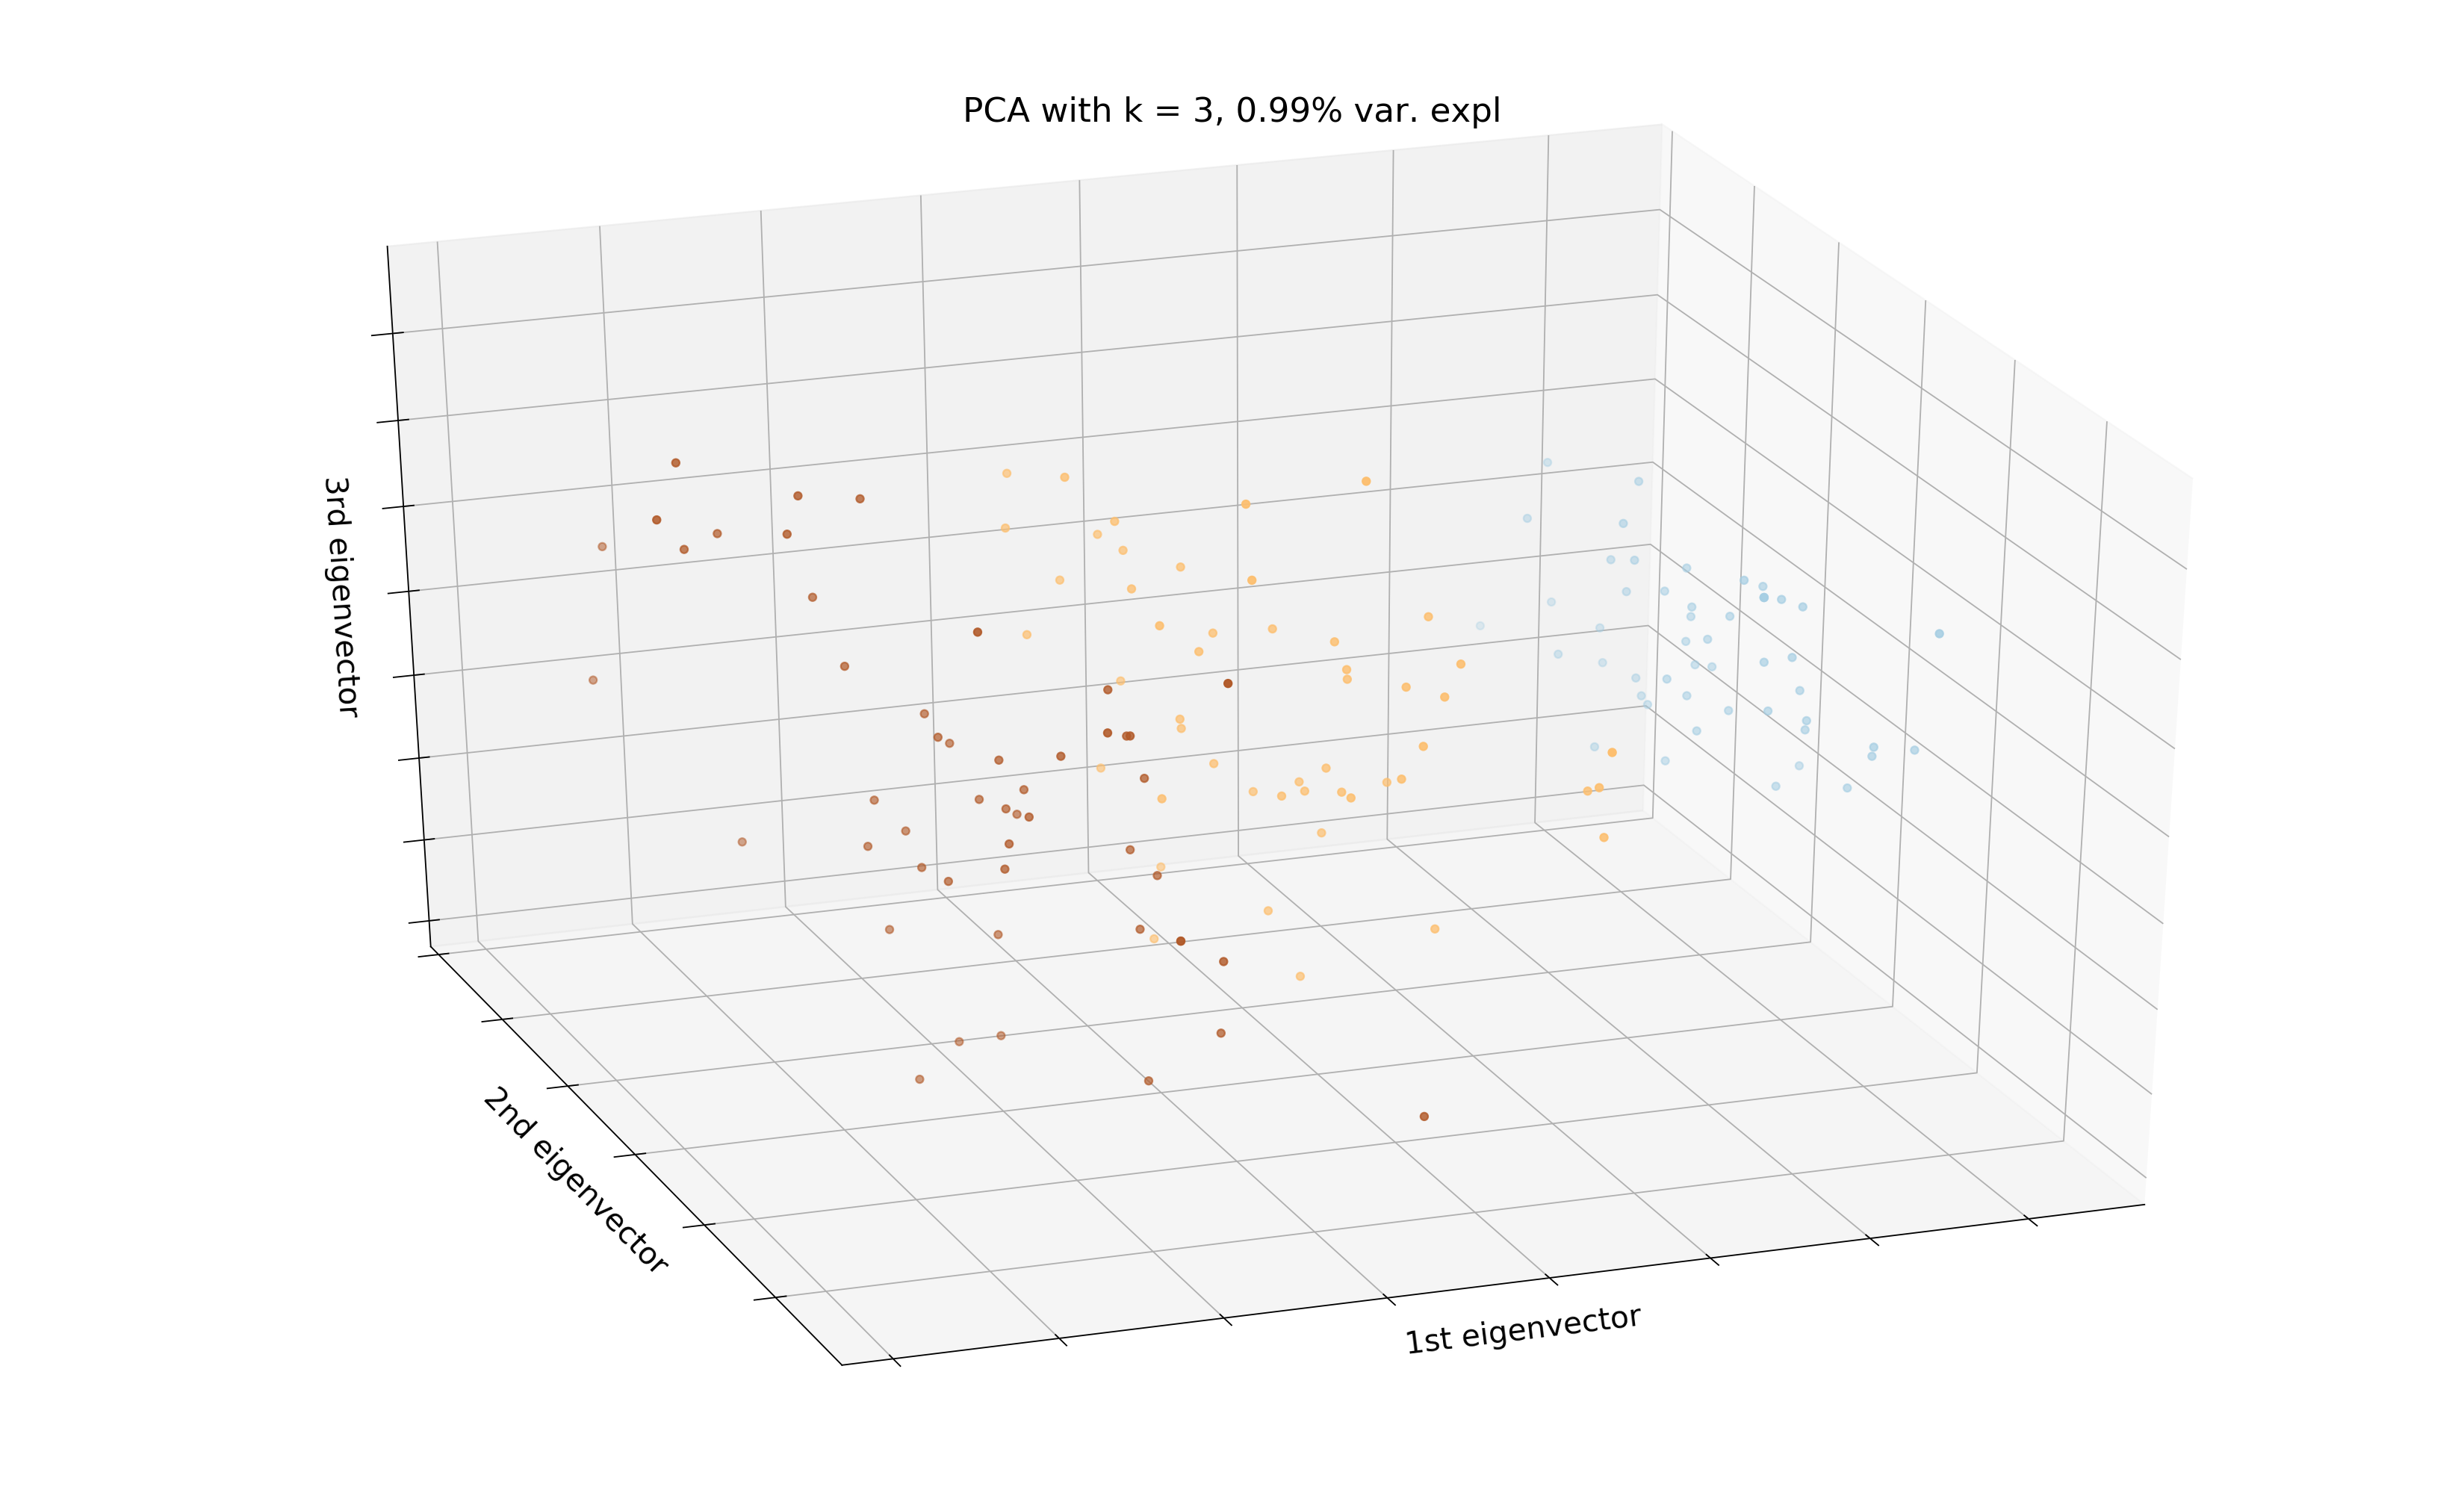

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# Prepare Iris data set with PCA on 2 dims
iris = datasets.load_iris()
pca = PCA(n_components=2)
X = pca.fit_transform(iris.data)
Y = iris.target

# 


# Second plot -> 2nd dimensionel
plt.figure(2) # select figure number 2
plt.clf() # clear current figure

# Plot the training points
# scatter plot, colors given by label
# colormap are "spectra" of colours.
# http://matplotlib.org/examples/color/colormaps_reference.html
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired) 

# configure the axes
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.xlabel('1st eigenvector') # labels of axis
plt.ylabel('2nd eigenvector')
plt.xlim(x_min, x_max) # the range of the axis
plt.ylim(y_min, y_max)
plt.xticks(()) # ticks are the values used to denote the axis
plt.yticks(())
plt.title("PCA with k = 2, %.2f%% var. expl." % sum(pca.explained_variance_ratio_))

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1)
ax = Axes3D(fig, elev=-150, azim=110)
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("PCA with k = 3, %.2f%% var. expl" % sum(pca.explained_variance_ratio_))
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

There are also different styles to use.

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

(-30, 10)

Text(15,-10,'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED')

Text(0.5,0,'time')

Text(0,0.5,'my overall health')

<Container object of 2 artists>

(-0.5, 1.5)

(0, 110)

[Text(0,0,'CONFIRMED BY\nEXPERIMENT'), Text(0,0,'REFUTED BY\nEXPERIMENT')]

([], <a list of 0 Text yticklabel objects>)

Text(0.5,1,'CLAIMS OF SUPERNATURAL POWERS')

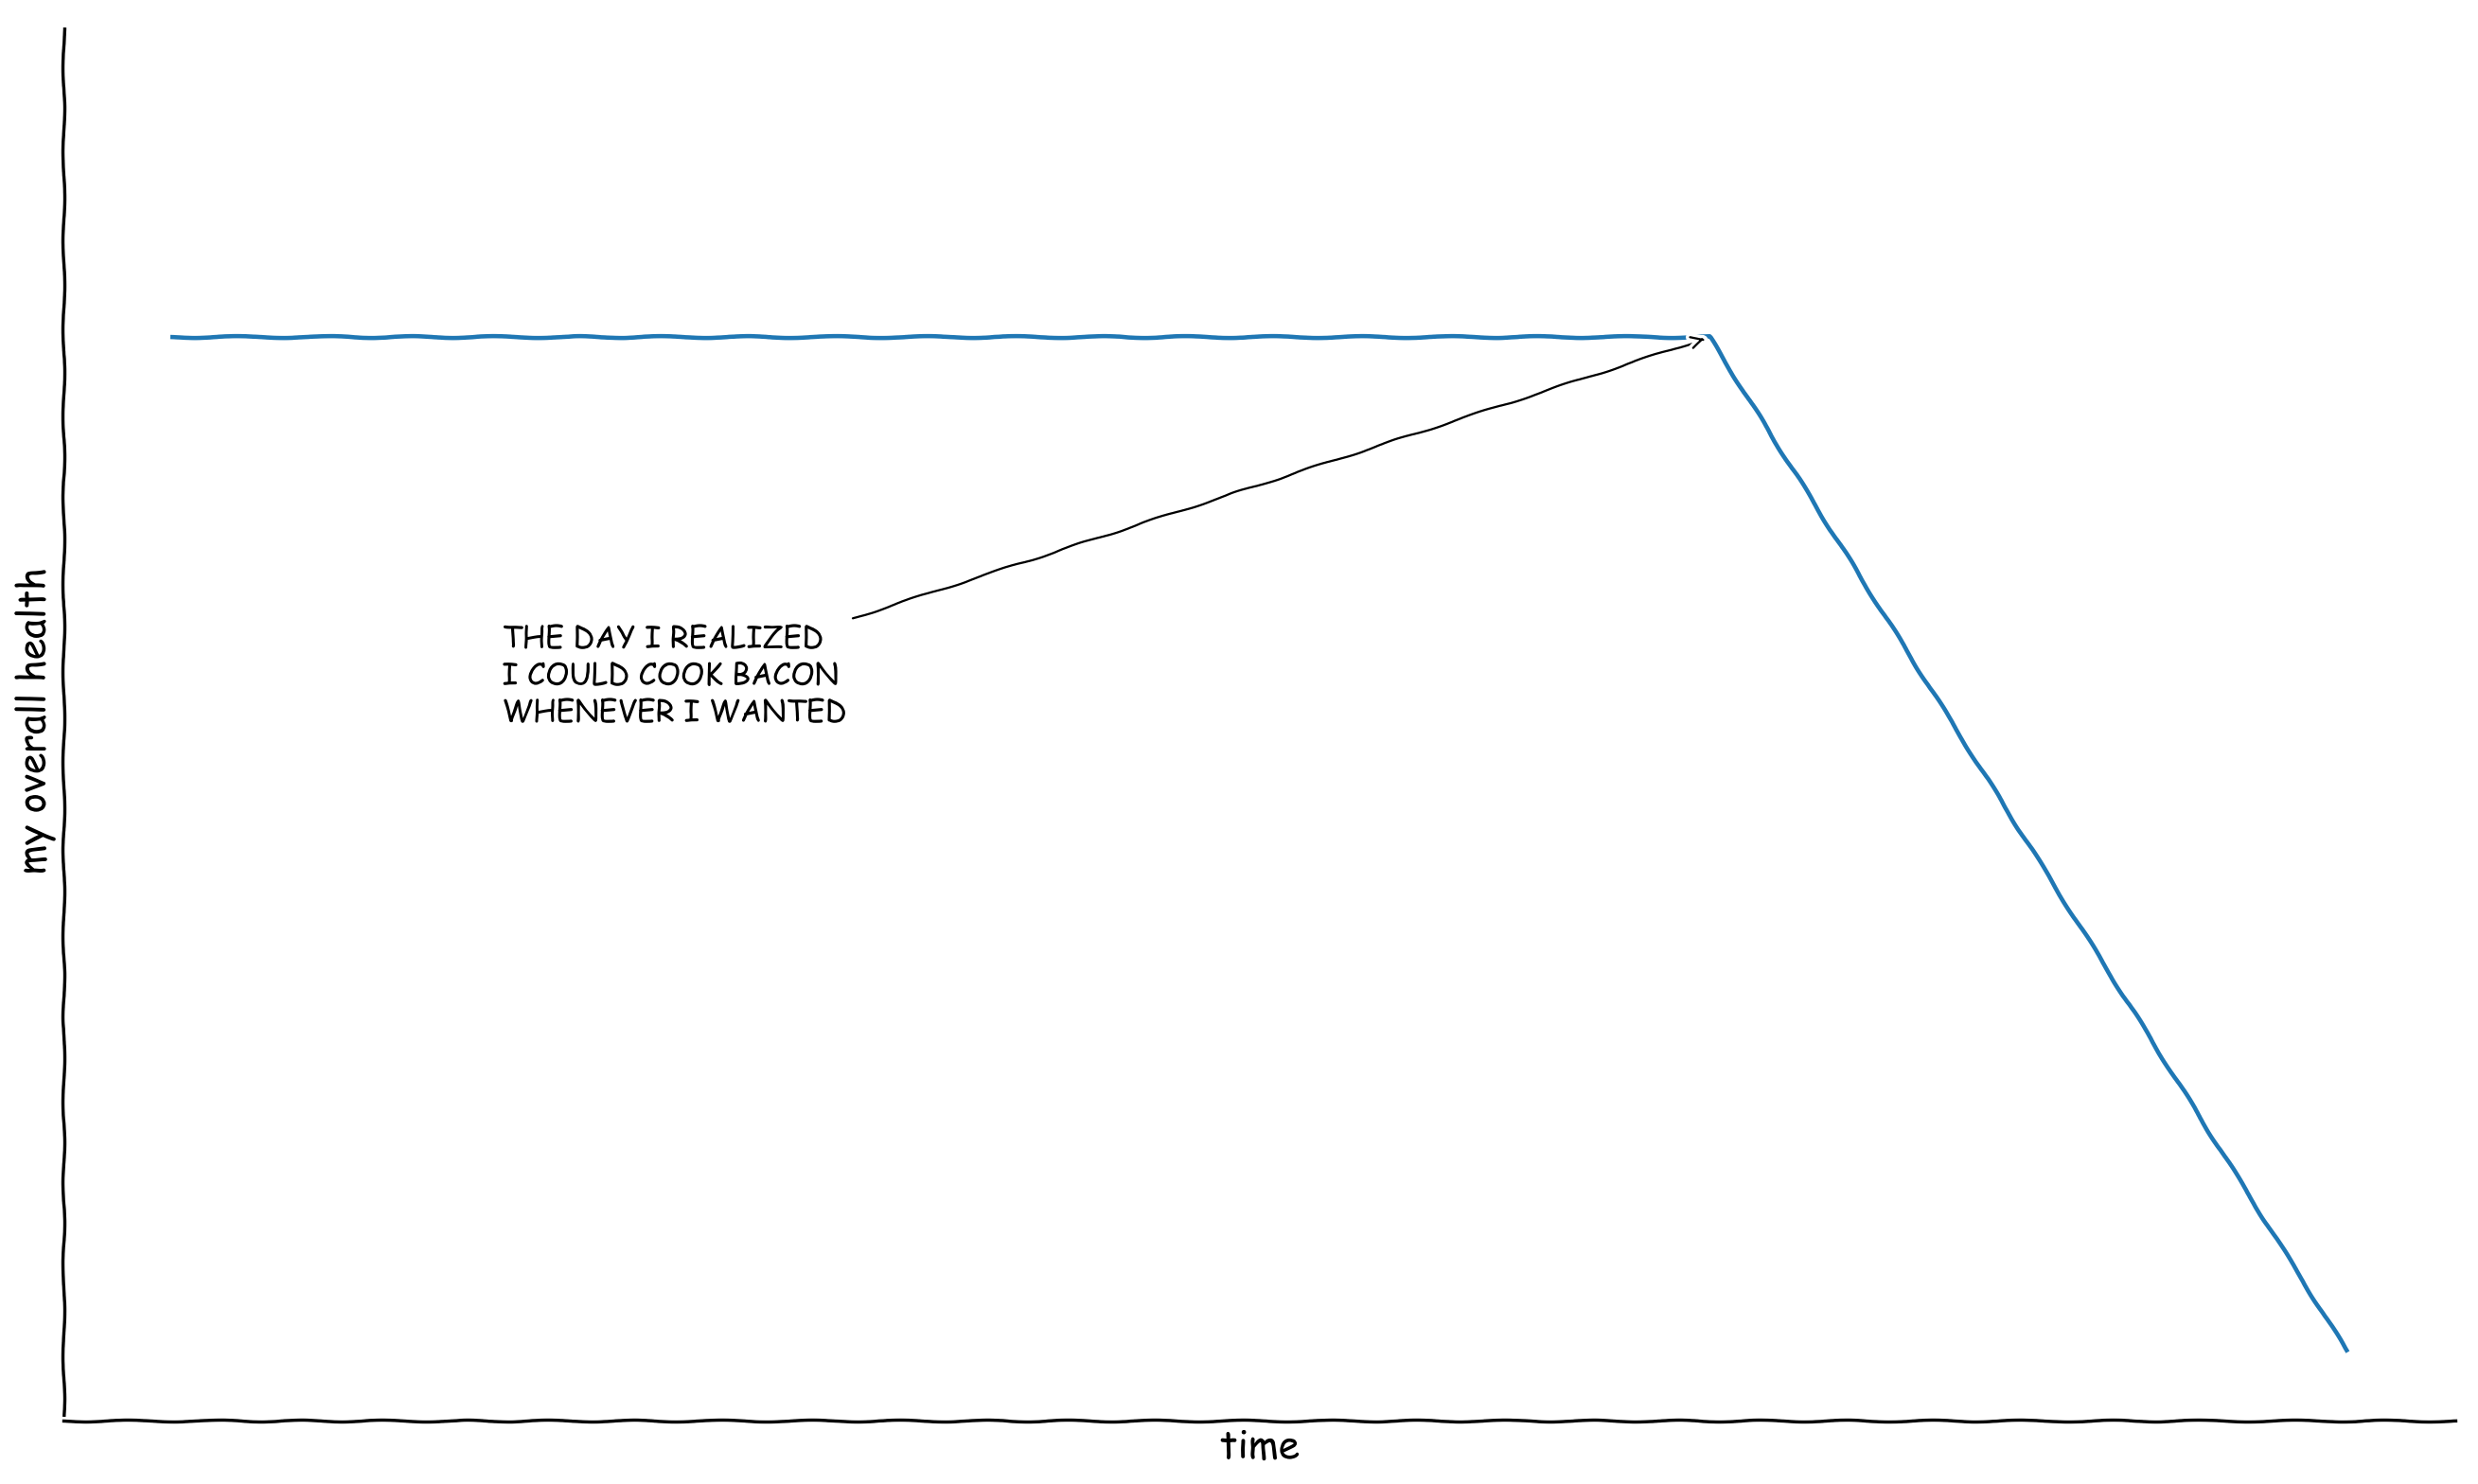

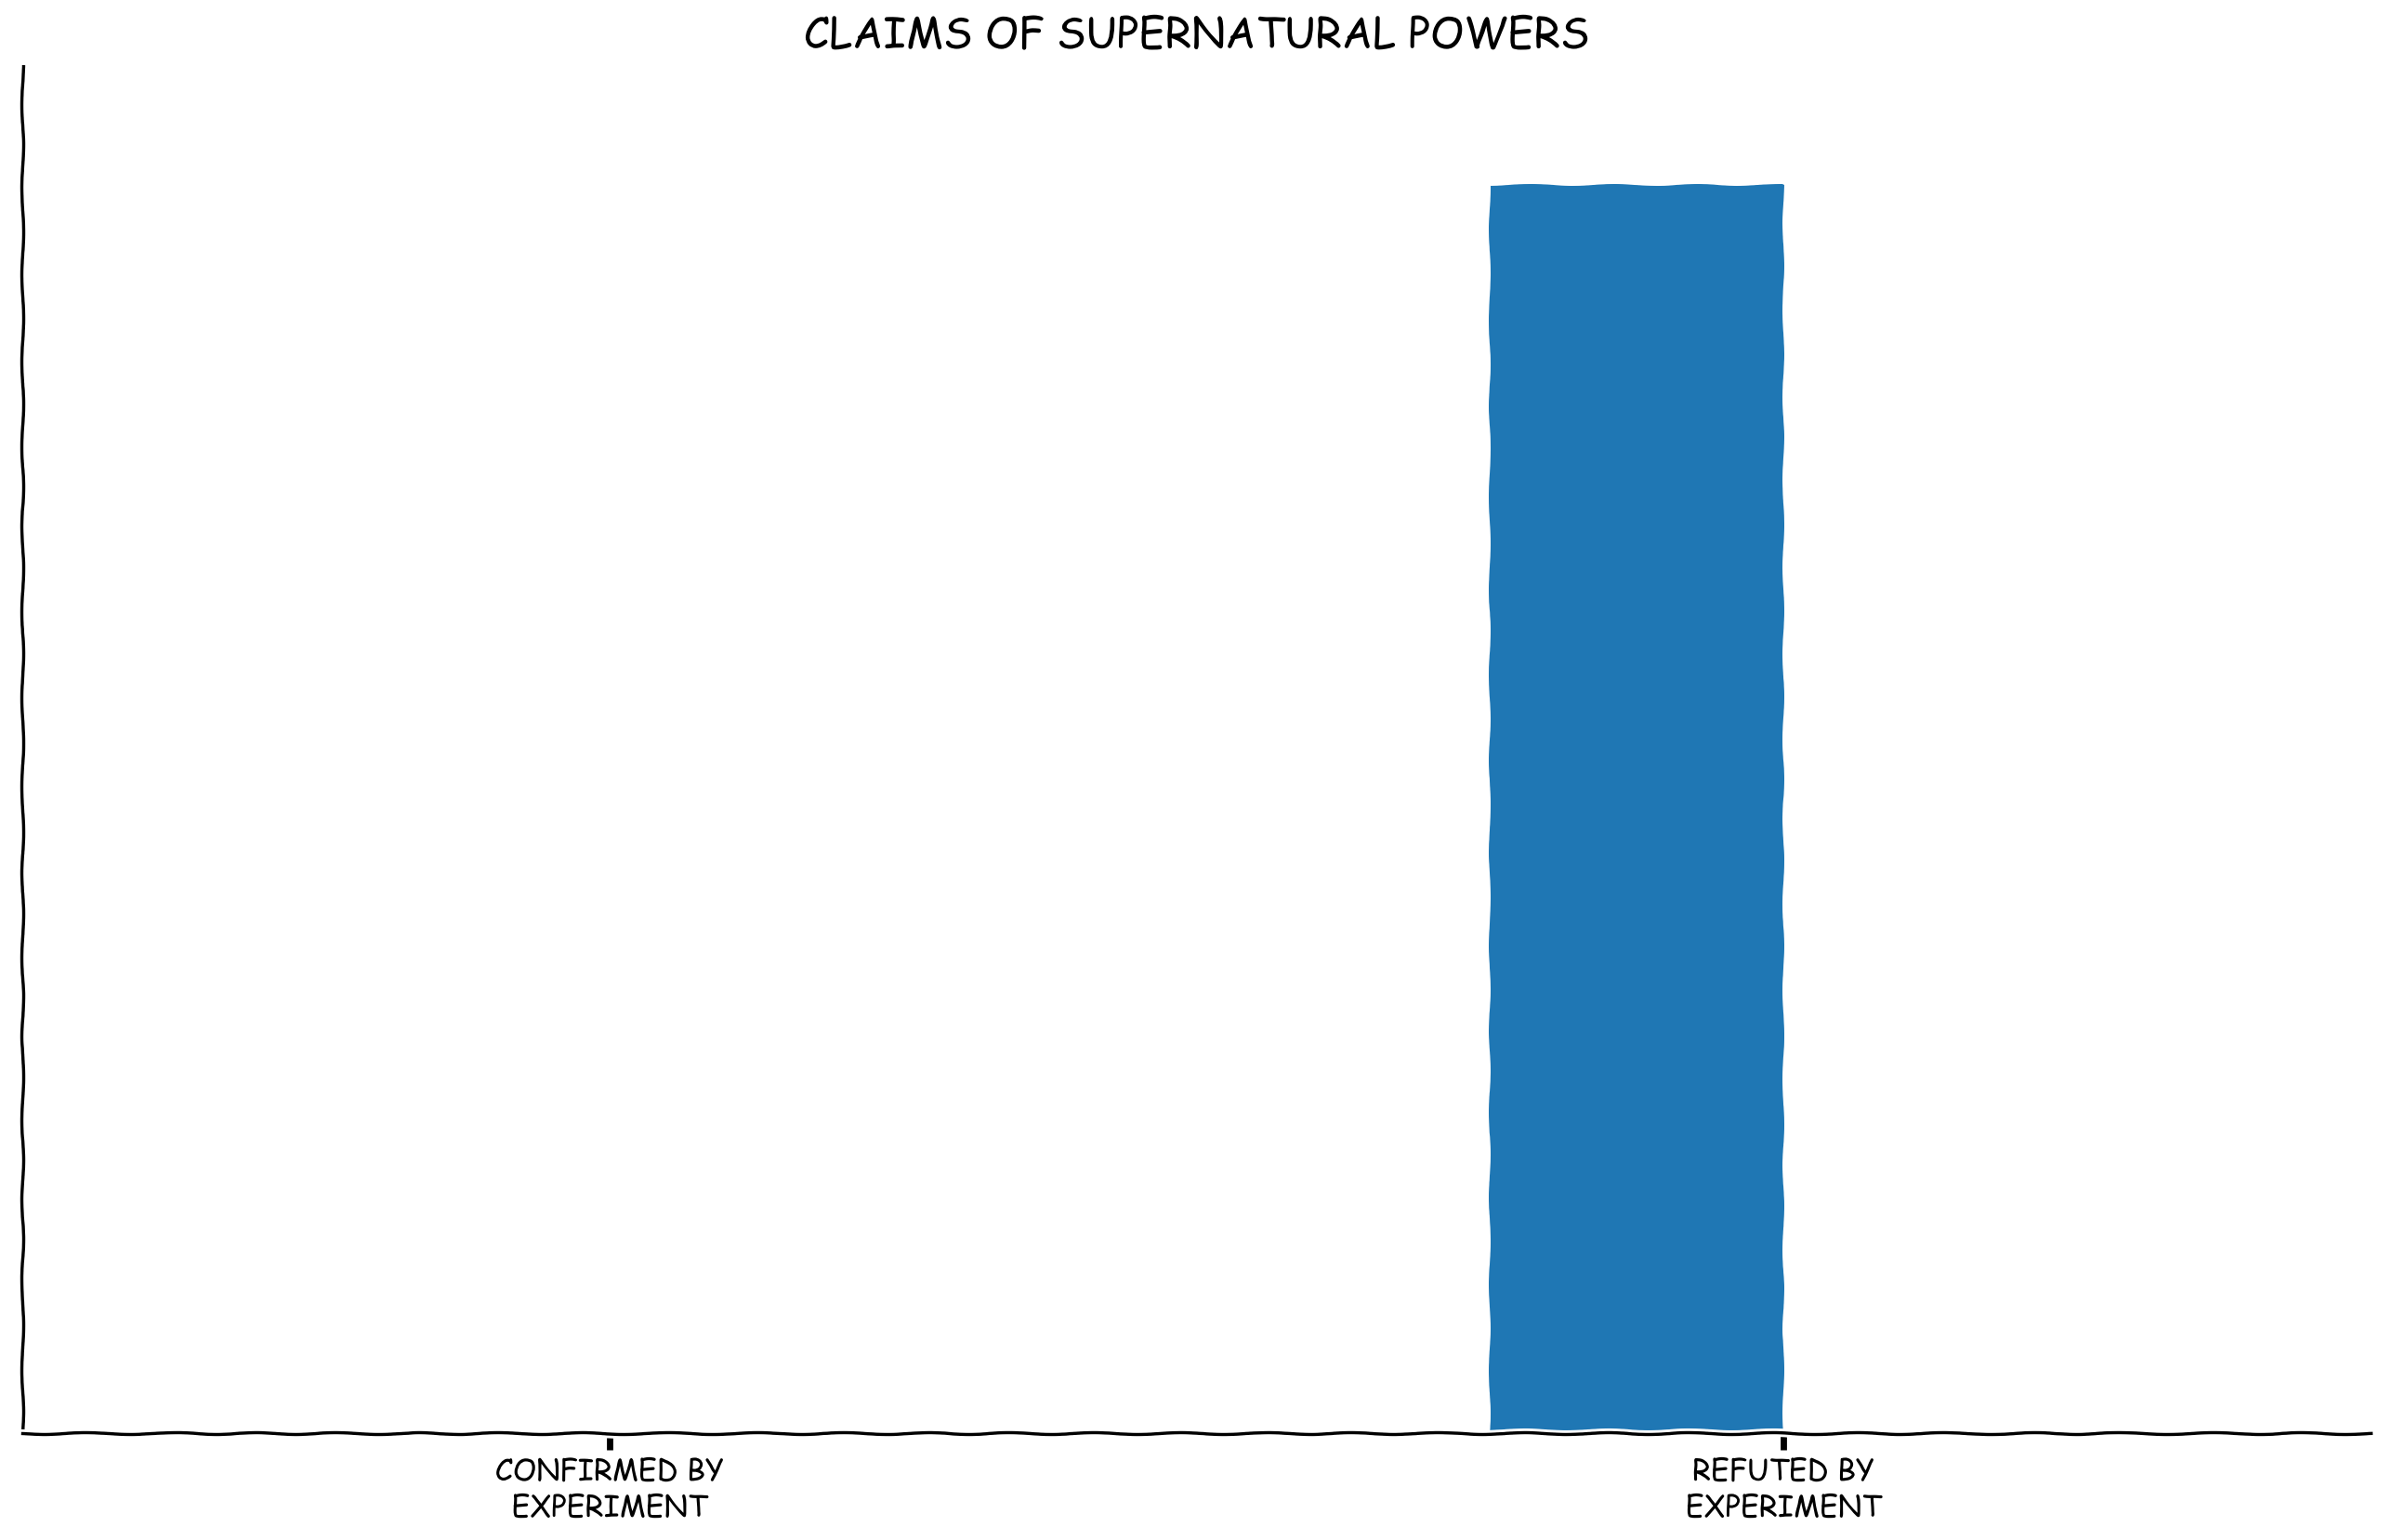

In [14]:
with plt.xkcd(): # without with not temporary!

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.bar([-0.125, 1.0-0.125], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    plt.yticks([])

    plt.title("CLAIMS OF SUPERNATURAL POWERS")

    plt.show()

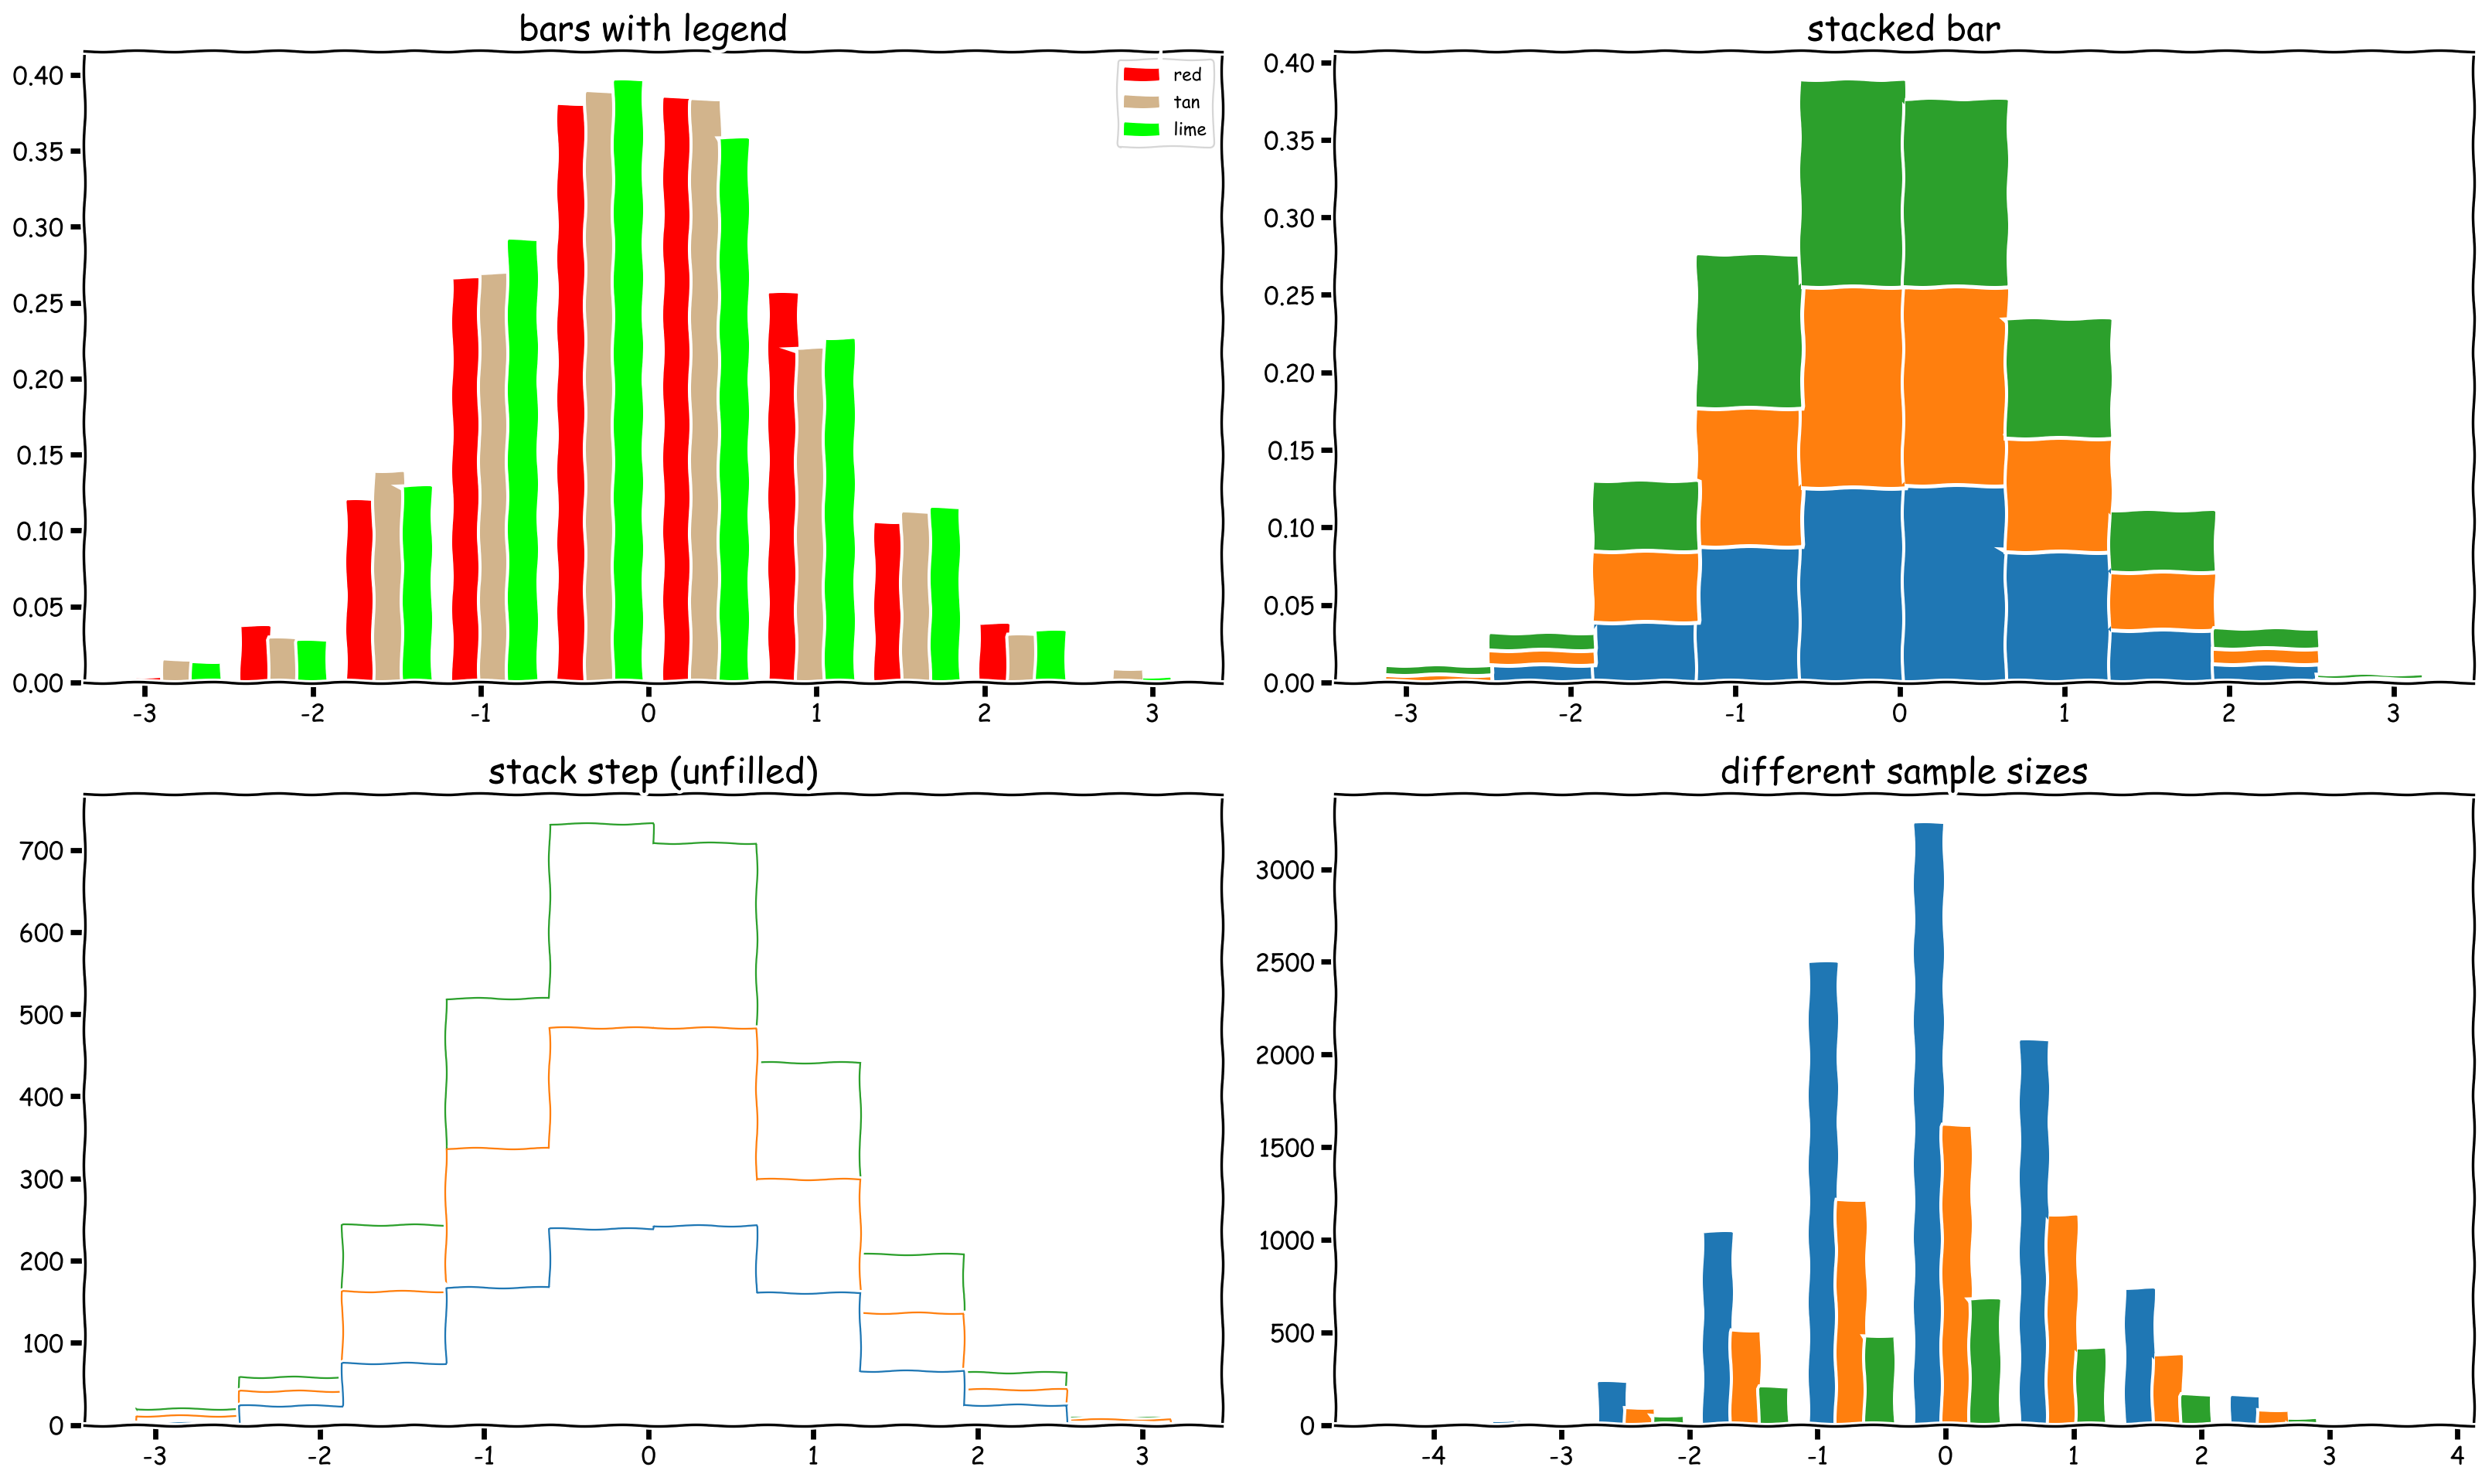

In [15]:
np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, normed=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, normed=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

Matplotlib offers much more functionality and if you see a plot in ML books it most often can be reproduced rather easily, if they base it on Matlab.

The gallery is most useful to inspect: http://matplotlib.org/gallery.html

## Seaborn

There are more styles for xkcd, which can be compared at https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html. In fact, *Seaborn* is a package that extends matplotlib's functionality to improve the layout of the plots without the need of code. Seaborn additionally provides new styles to choose from and new plot types. _Careful_ importing Seaborn overwrites the currently selected style.

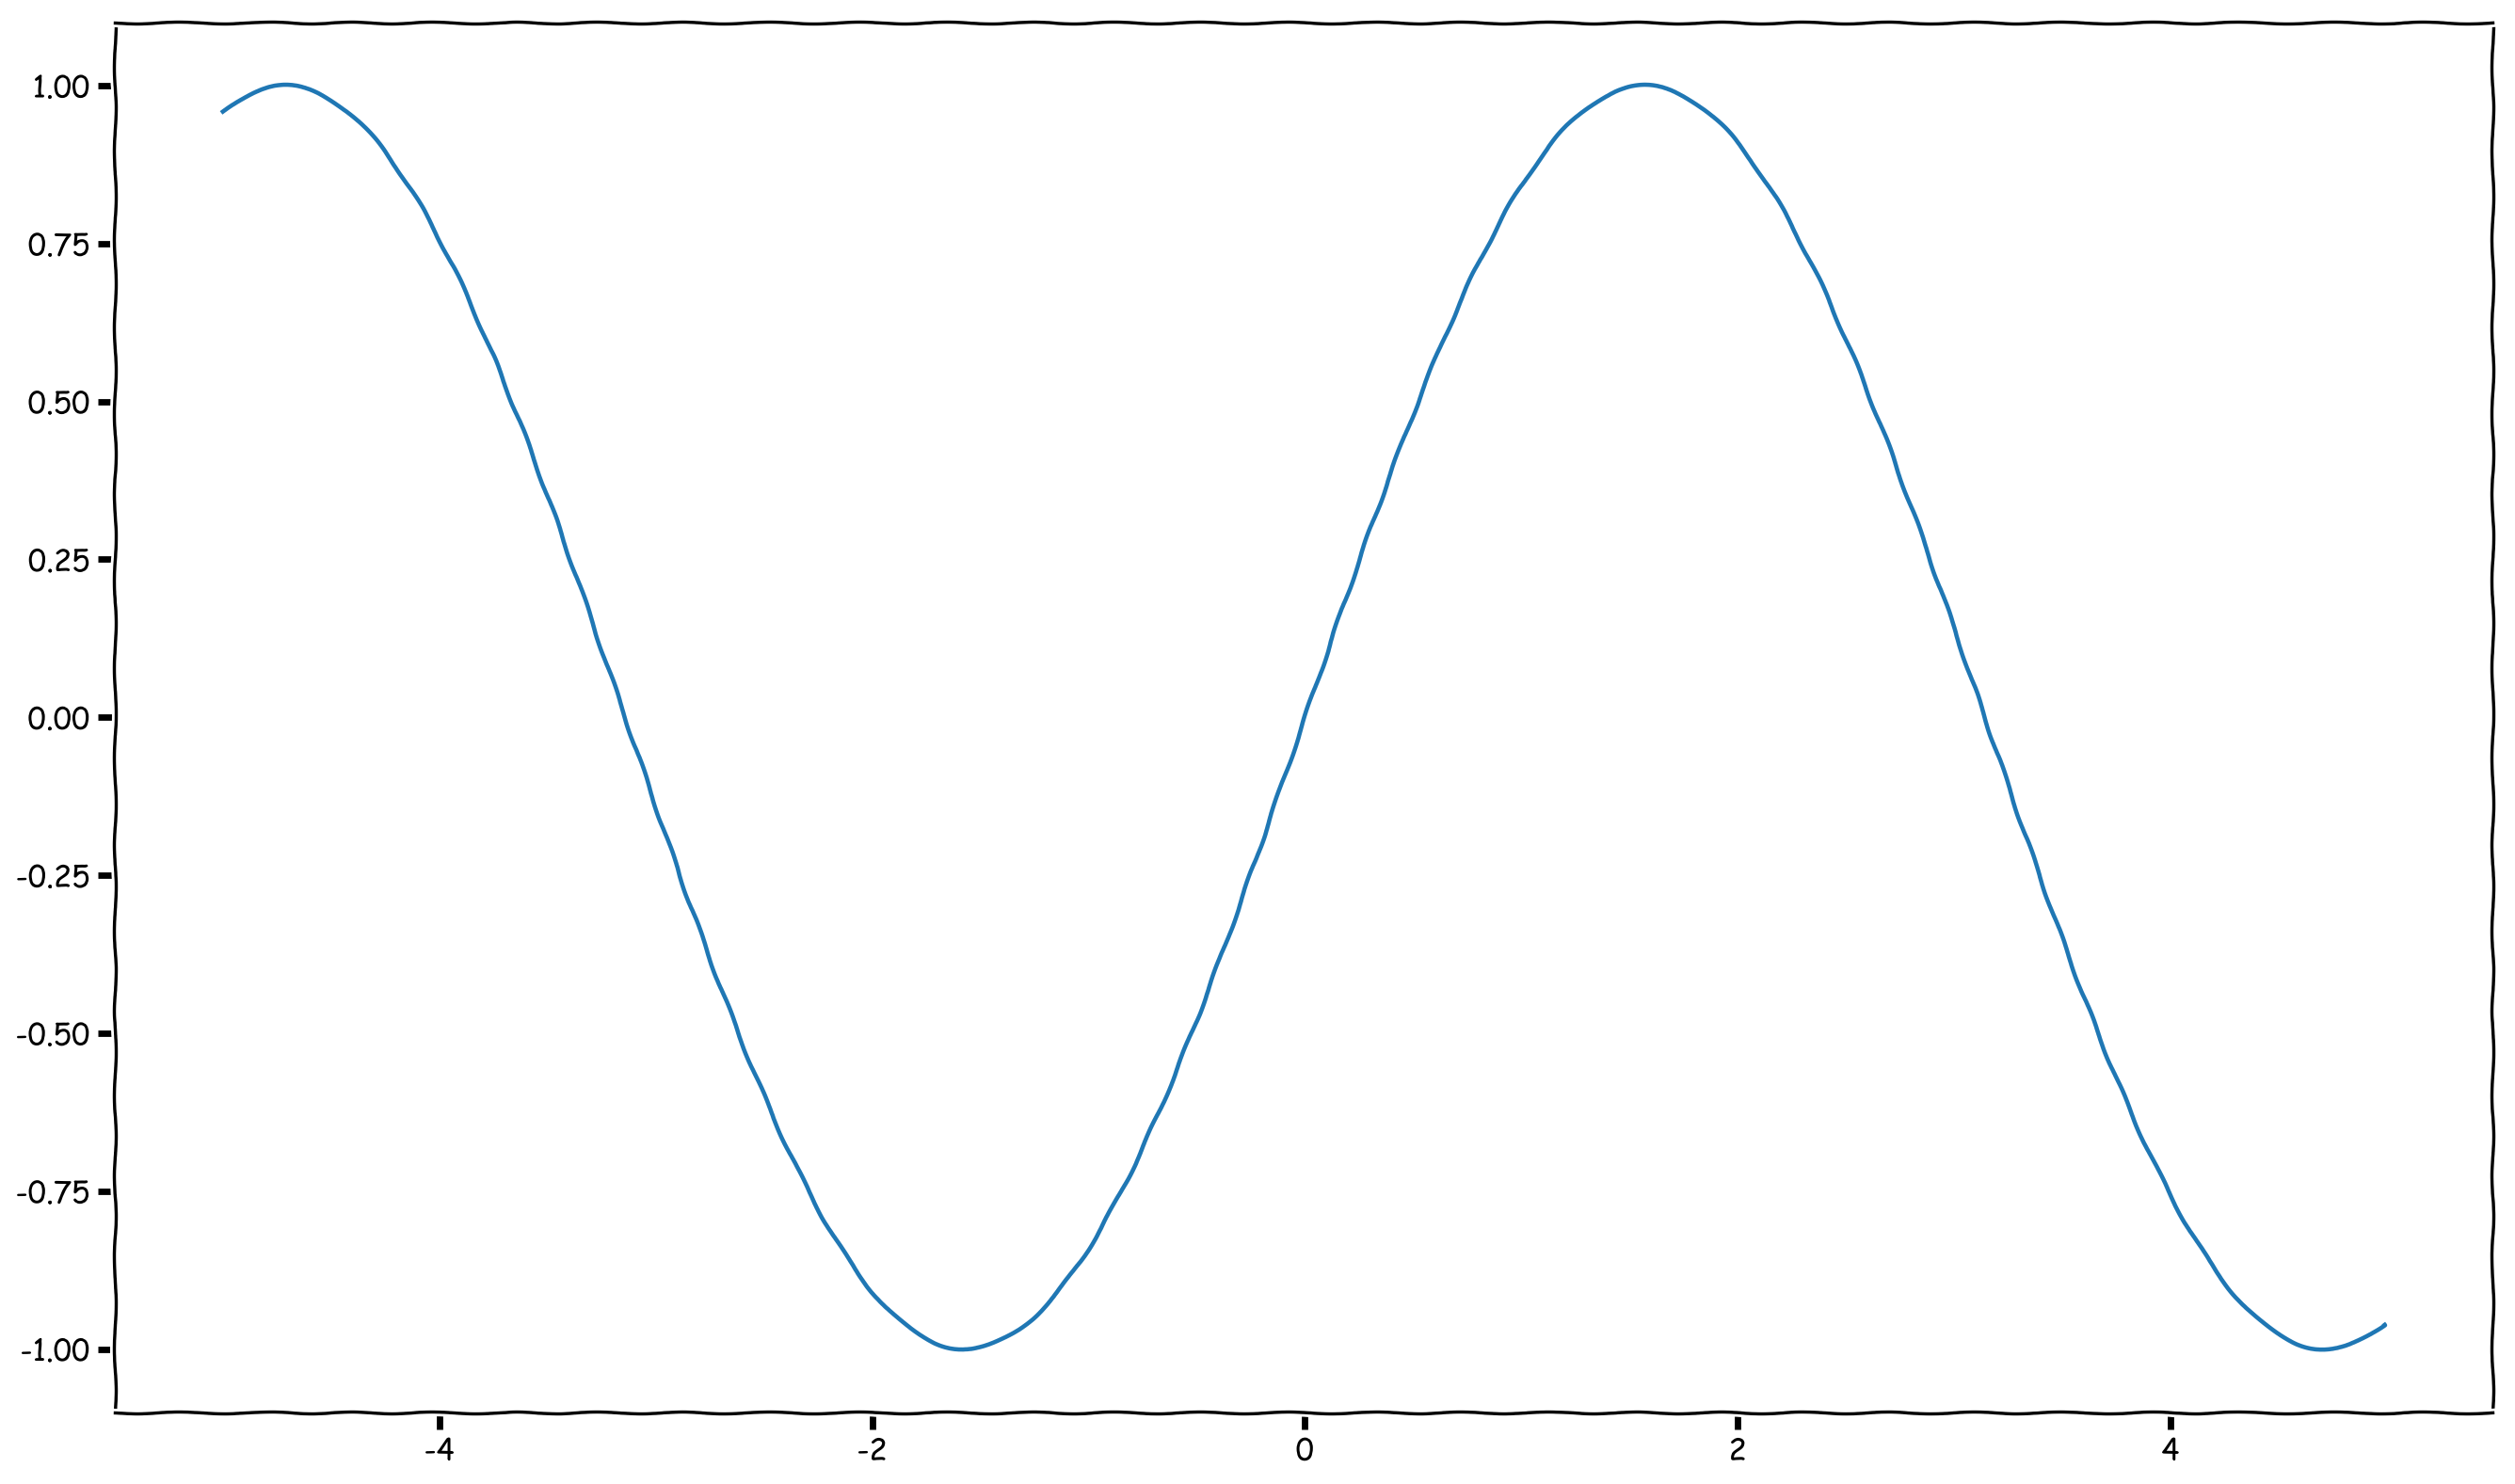

In [16]:
from math import *

X = np.arange(-5, 5, 0.01)
Y = [sin(x) for x in X]
plt.plot(X, Y)

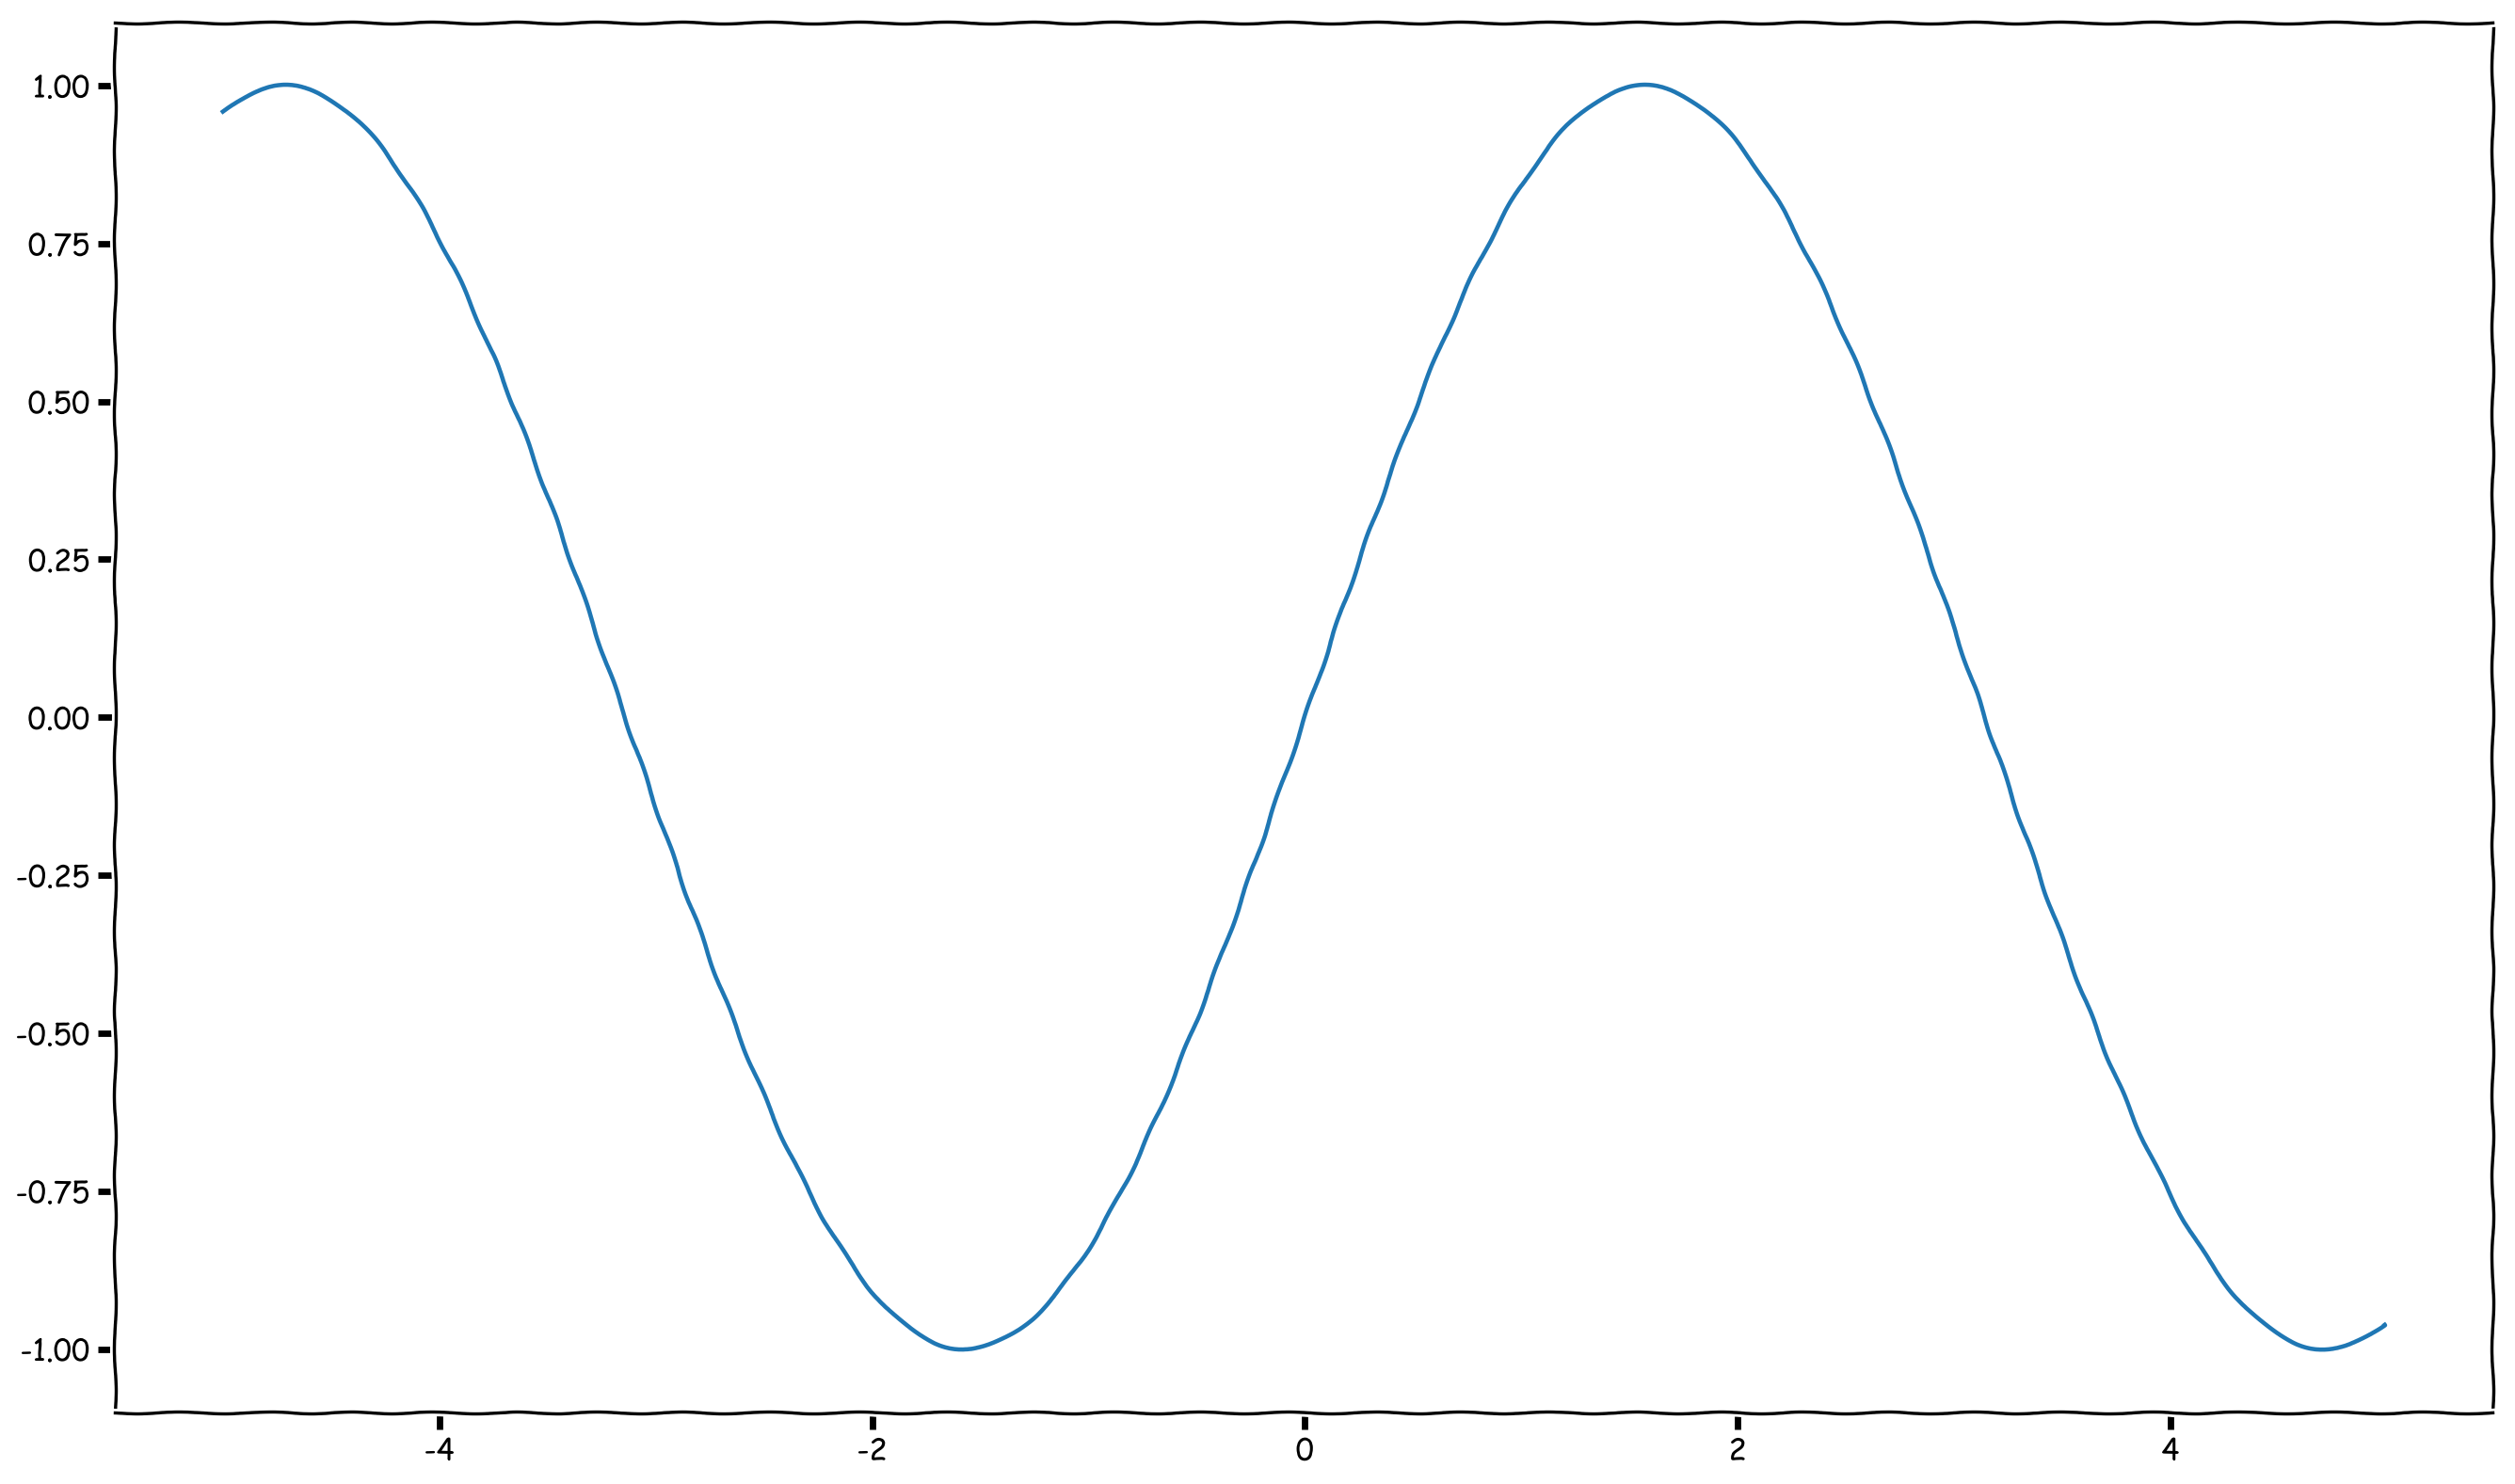

In [17]:
import seaborn as sns
plt.plot(X, Y)

### ggplot

In [18]:
!pip install ggplot

pyspark 2.3.0 has requirement py4j==0.10.6, but you'll have py4j 0.10.4 which is incompatible.


In [19]:
from ggplot import *
diamonds.head()

/Users/uberwach/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/uberwach/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/uberwach/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


First choose an aesthetic. We then add components to the grid step by step to show how ggplots are composed "algebraically".

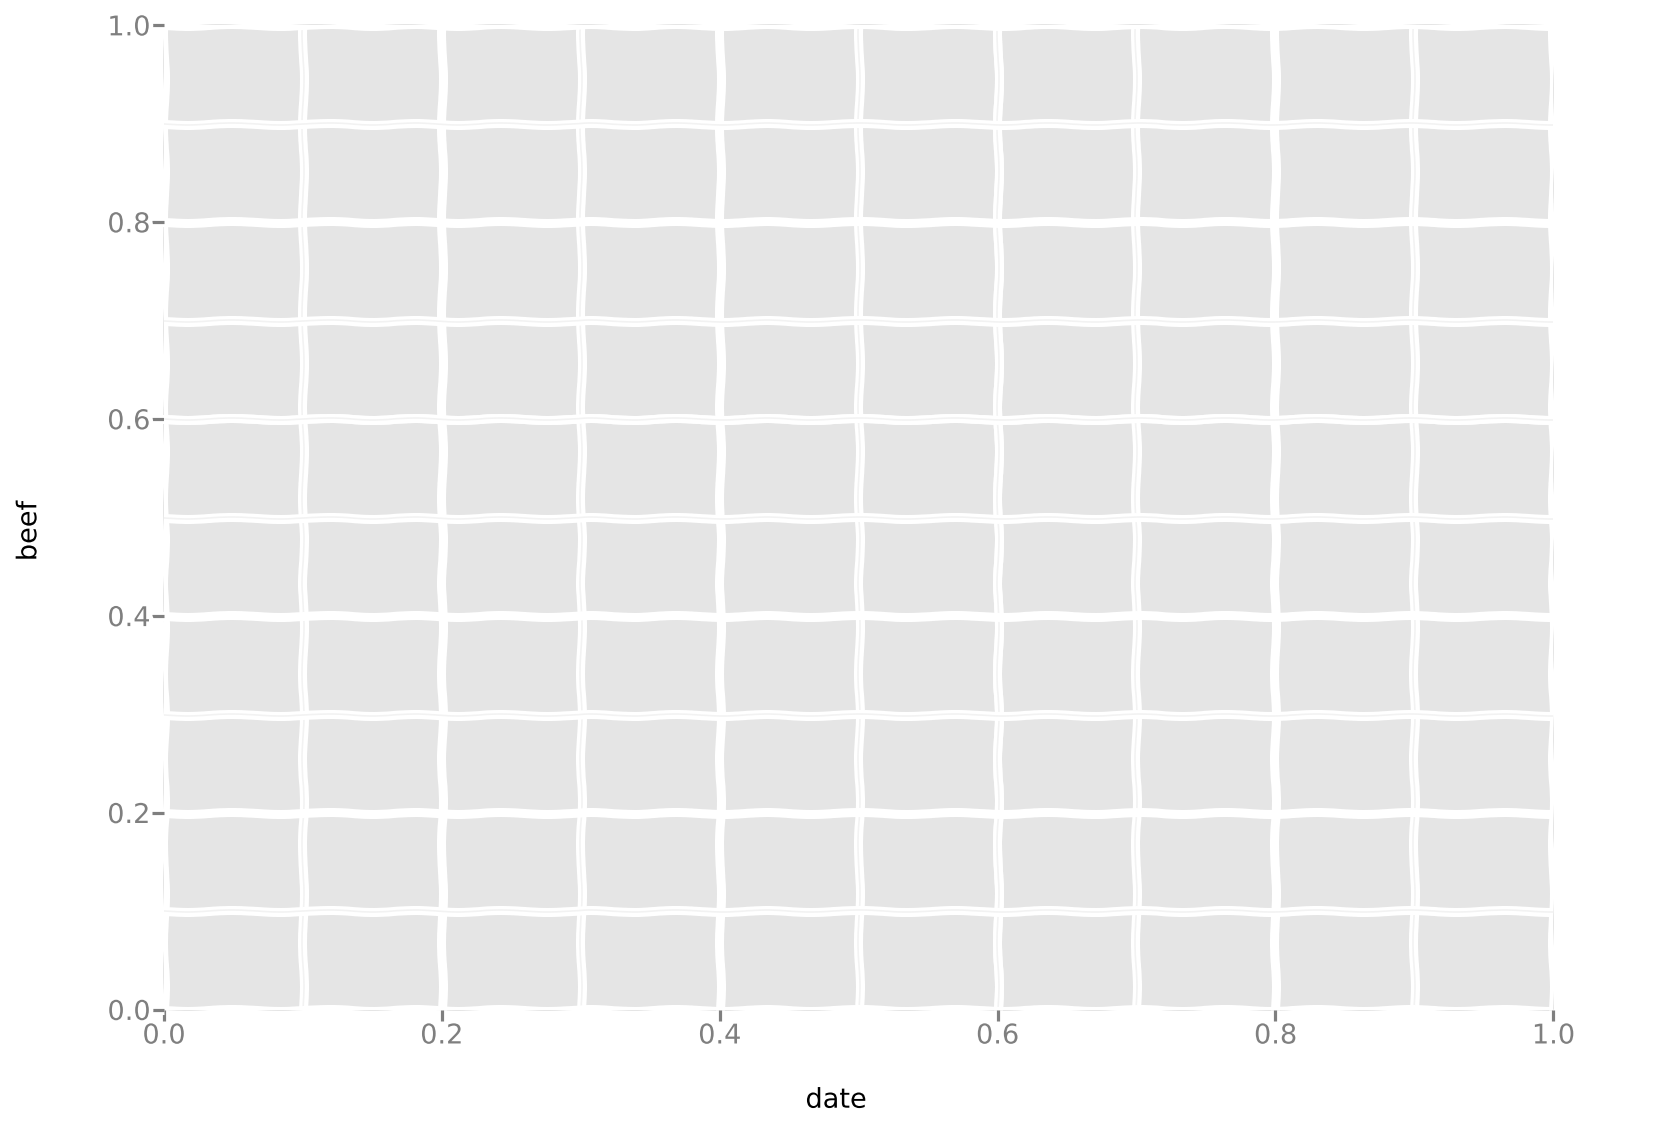

<ggplot: (7008091119)>

In [20]:
p = ggplot(aes(x='date', y='beef'), data=meat)
p

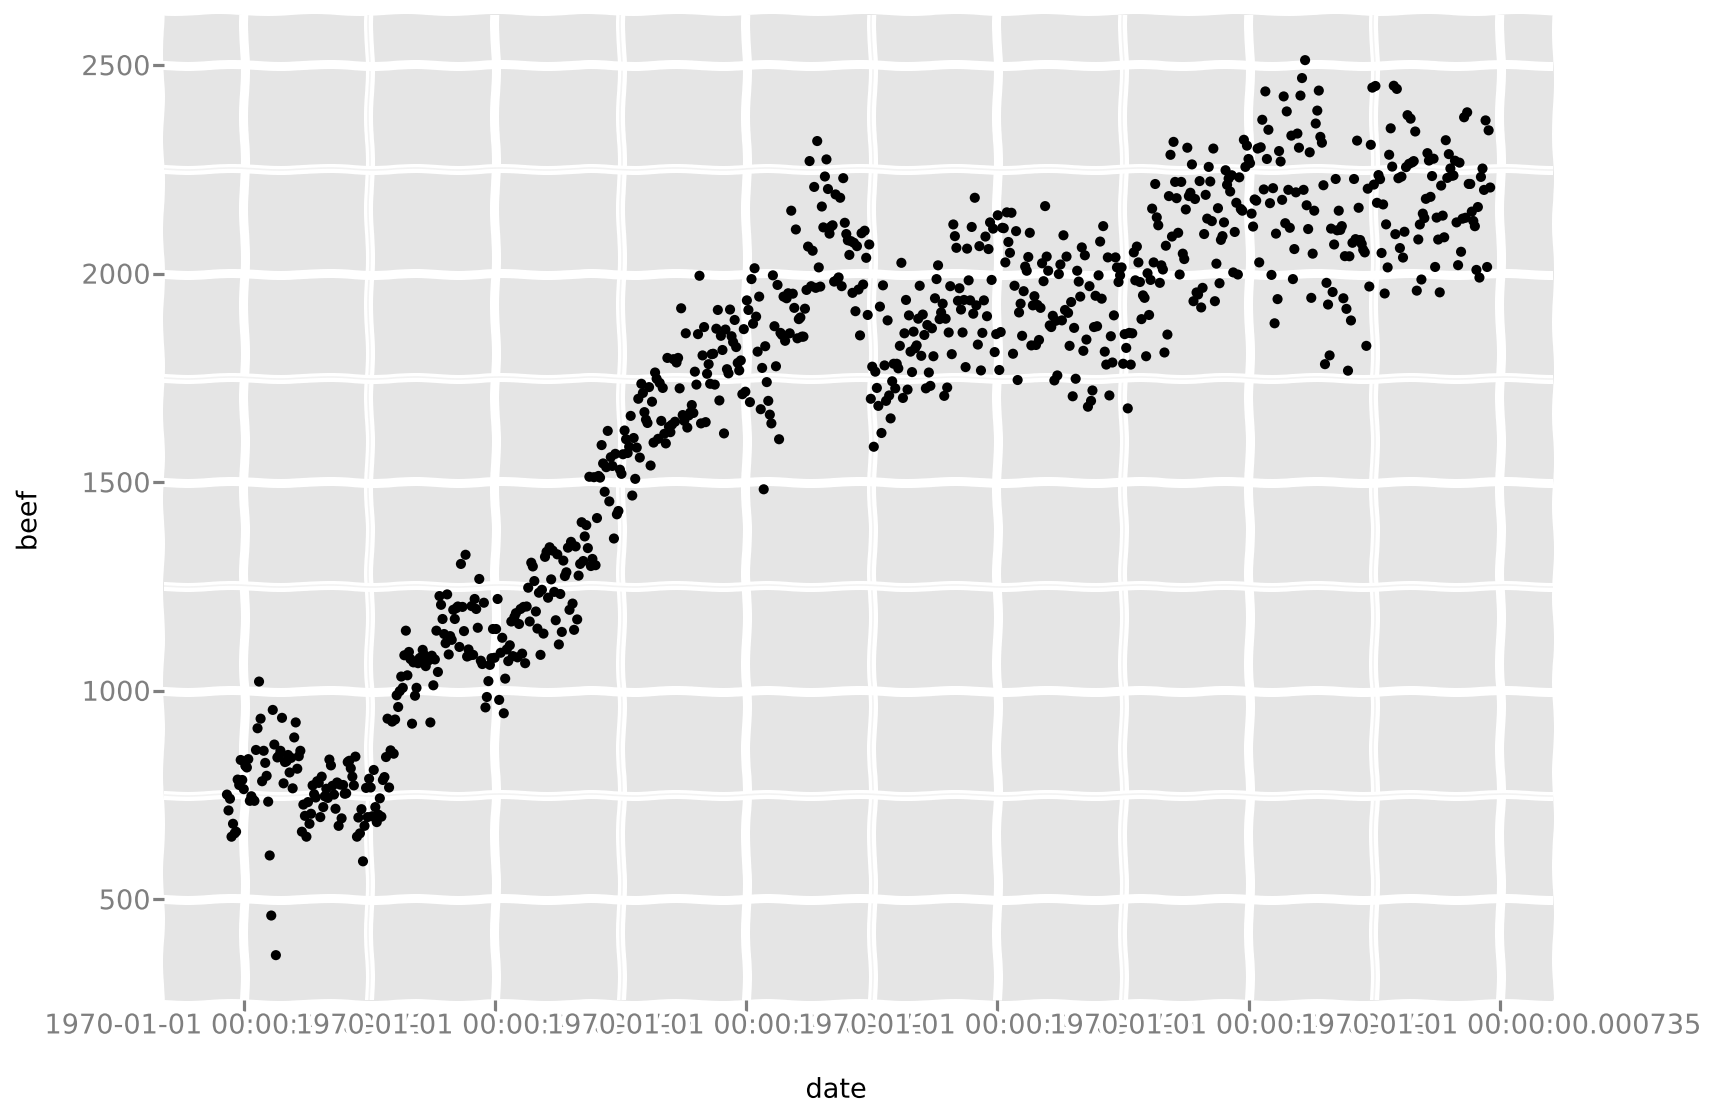

<ggplot: (7008091119)>

In [21]:
p + geom_point()

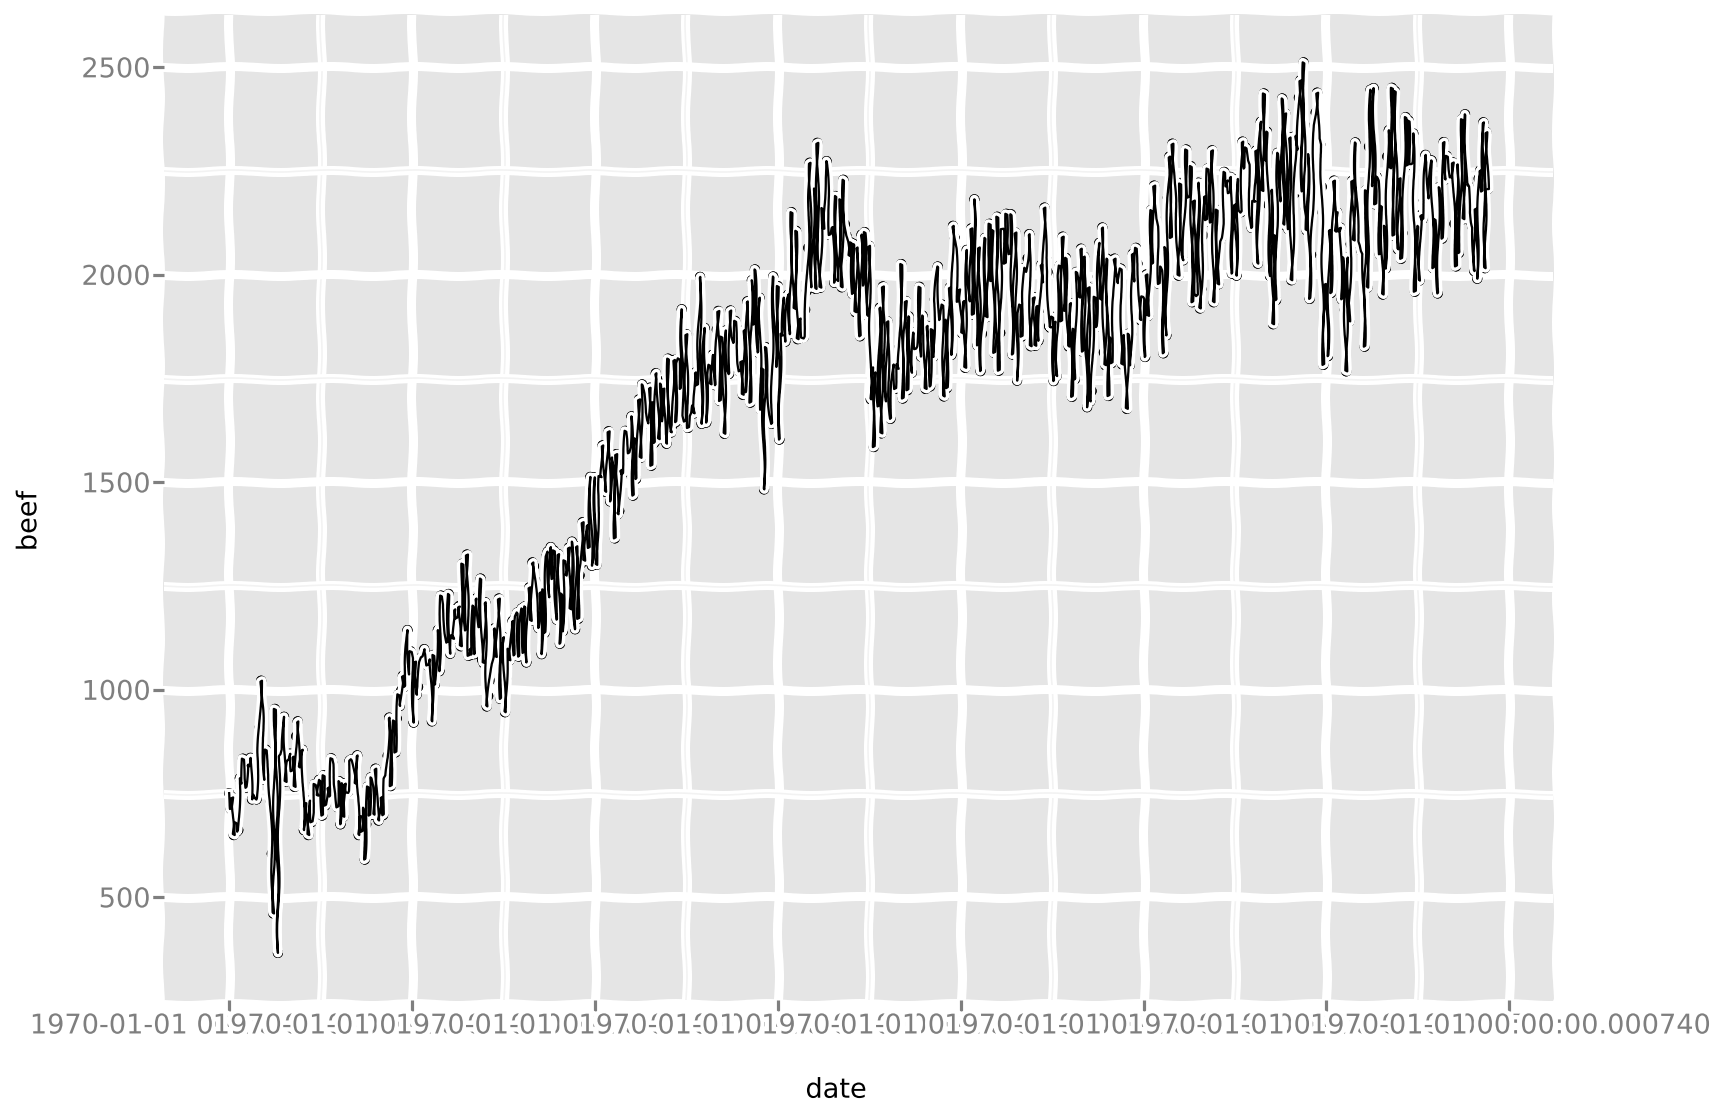

<ggplot: (7008091119)>

In [22]:
p + geom_point() + geom_line()

AttributeError: 'DataFrame' object has no attribute 'sort'

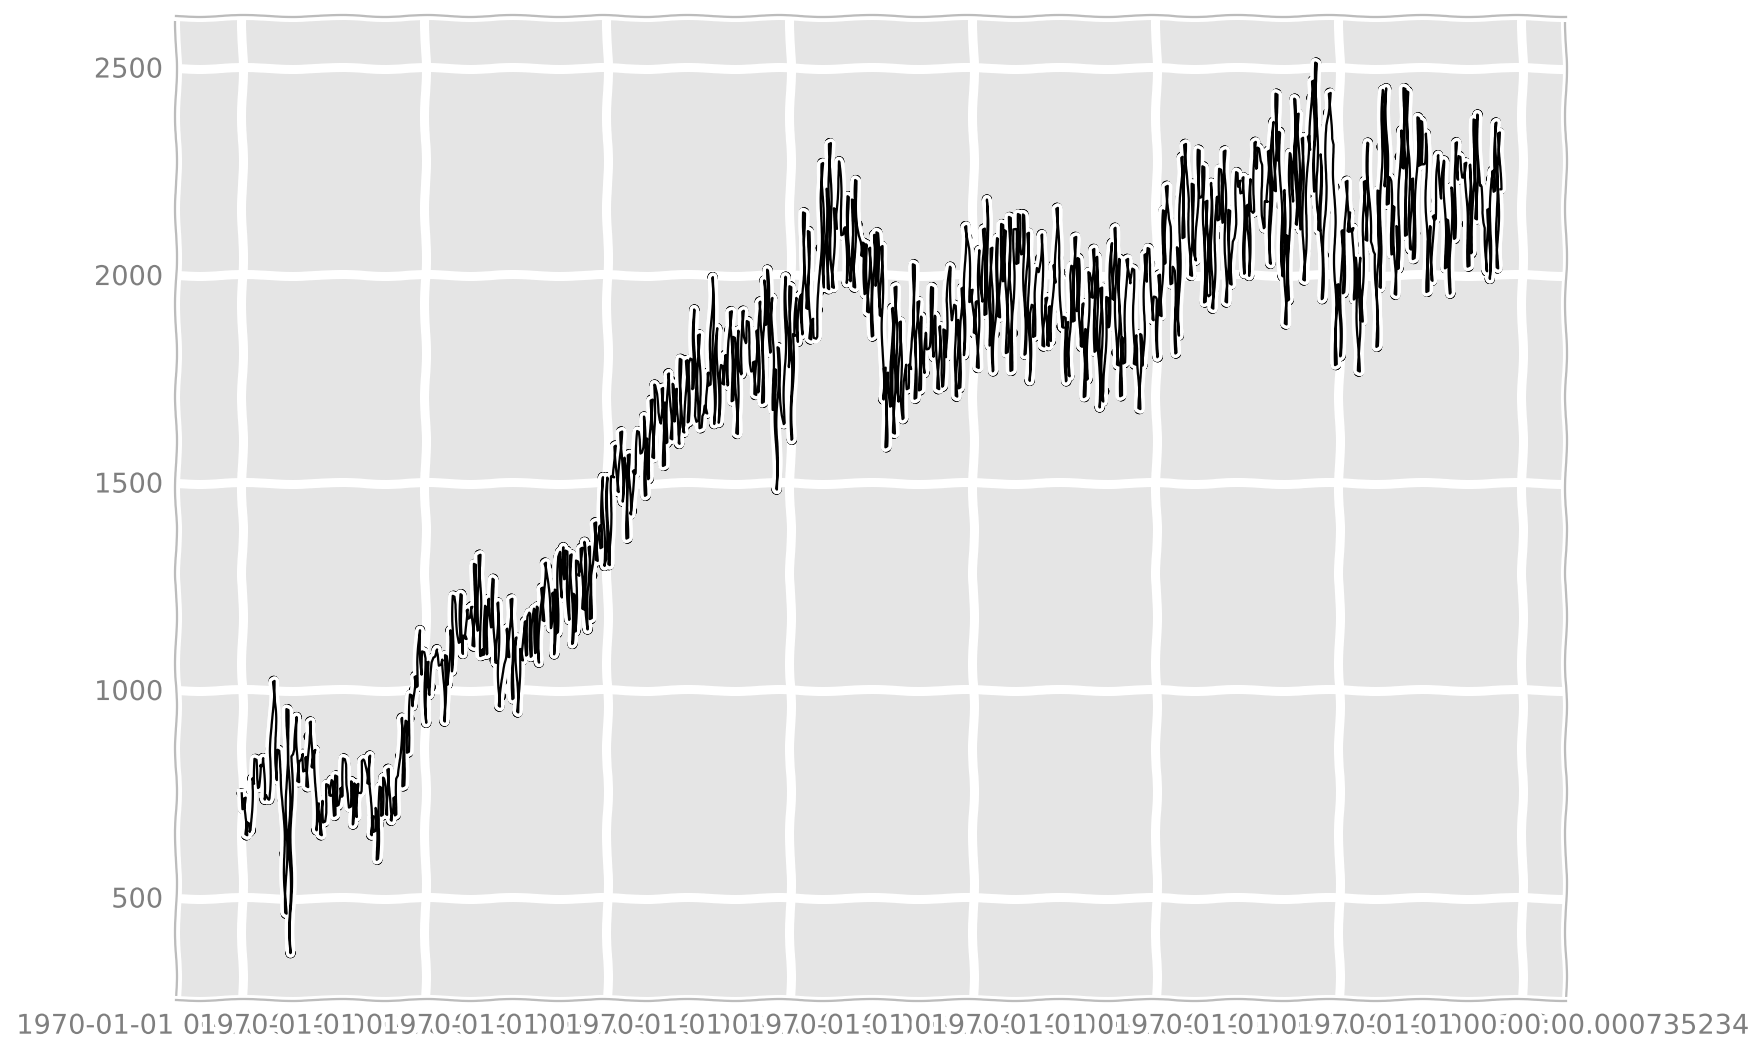

In [23]:
p + geom_point() + geom_line() + stat_smooth(color='blue')

In [24]:
import pygal
from IPython.display import SVG, HTML, display
display(SVG(pygal.Bar()(1, 3, 3, 7)(1, 6, 6, 4).render()))

ModuleNotFoundError: No module named 'pygal'

In [ ]:
html_pygal = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/pygal-tooltips.js"></script>
    <!-- ... -->
  </head>
  <body>
    <figure>
      {pygal_render}
    </figure>
  </body>
</html>
"""

In [ ]:
ages = [(364381, 358443, 360172, 345848, 334895, 326914, 323053, 312576, 302015, 301277, 309874, 318295, 323396, 332736, 330759, 335267, 345096, 352685, 368067, 381521, 380145, 378724, 388045, 382303, 373469, 365184, 342869, 316928, 285137, 273553, 250861, 221358, 195884, 179321, 171010, 162594, 152221, 148843, 143013, 135887, 125824, 121493, 115913, 113738, 105612, 99596, 91609, 83917, 75688, 69538, 62999, 58864, 54593, 48818, 44739, 41096, 39169, 36321, 34284, 32330, 31437, 30661, 31332, 30334, 23600, 21999, 20187, 19075, 16574, 15091, 14977, 14171, 13687, 13155, 12558, 11600, 10827, 10436, 9851, 9794, 8787, 7993, 6901, 6422, 5506, 4839, 4144, 3433, 2936, 2615),
   (346205, 340570, 342668, 328475, 319010, 312898, 308153, 296752, 289639, 290466, 296190, 303871, 309886, 317436, 315487, 316696, 325772, 331694, 345815, 354696, 354899, 351727, 354579, 341702, 336421, 321116, 292261, 261874, 242407, 229488, 208939, 184147, 162662, 147361, 140424, 134336, 126929, 125404, 122764, 116004, 105590, 100813, 95021, 90950, 85036, 79391, 72952, 66022, 59326, 52716, 46582, 42772, 38509, 34048, 30887, 28053, 26152, 23931, 22039, 20677, 19869, 19026, 18757, 18308, 14458, 13685, 12942, 12323, 11033, 10183, 10628, 10803, 10655, 10482, 10202, 10166, 9939, 10138, 10007, 10174, 9997, 9465, 9028, 8806, 8450, 7941, 7253, 6698, 6267, 5773),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 91, 412, 1319, 2984, 5816, 10053, 16045, 24240, 35066, 47828, 62384, 78916, 97822, 112738, 124414, 130658, 140789, 153951, 168560, 179996, 194471, 212006, 225209, 228886, 239690, 245974, 253459, 255455, 260715, 259980, 256481, 252222, 249467, 240268, 238465, 238167, 231361, 223832, 220459, 222512, 220099, 219301, 221322, 229783, 239336, 258360, 271151, 218063, 213461, 207617, 196227, 174615, 160855, 165410, 163070, 157379, 149698, 140570, 131785, 119936, 113751, 106989, 99294, 89097, 78413, 68174, 60592, 52189, 43375, 35469, 29648, 24575, 20863),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 74, 392, 1351, 3906, 7847, 12857, 19913, 29108, 42475, 58287, 74163, 90724, 108375, 125886, 141559, 148061, 152871, 159725, 171298, 183536, 196136, 210831, 228757, 238731, 239616, 250036, 251759, 259593, 261832, 264864, 264702, 264070, 258117, 253678, 245440, 241342, 239843, 232493, 226118, 221644, 223440, 219833, 219659, 221271, 227123, 232865, 250646, 261796, 210136, 201824, 193109, 181831, 159280, 145235, 145929, 140266, 133082, 124350, 114441, 104655, 93223, 85899, 78800, 72081, 62645, 53214, 44086, 38481, 32219, 26867, 21443, 16899, 13680, 11508),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 5, 17, 15, 31, 34, 38, 35, 45, 299, 295, 218, 247, 252, 254, 222, 307, 316, 385, 416, 463, 557, 670, 830, 889, 1025, 1149, 1356, 1488, 1835, 1929, 2130, 2362, 2494, 2884, 3160, 3487, 3916, 4196, 4619, 5032, 5709, 6347, 7288, 8139, 9344, 11002, 12809, 11504, 11918, 12927, 13642, 13298, 14015, 15751, 17445, 18591, 19682, 20969, 21629, 22549, 23619, 25288, 26293, 27038, 27039, 27070, 27750, 27244, 25905, 24357, 22561, 21794, 20595),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 8, 0, 8, 21, 34, 49, 84, 97, 368, 401, 414, 557, 654, 631, 689, 698, 858, 1031, 1120, 1263, 1614, 1882, 2137, 2516, 2923, 3132, 3741, 4259, 4930, 5320, 5948, 6548, 7463, 8309, 9142, 10321, 11167, 12062, 13317, 15238, 16706, 18236, 20336, 23407, 27024, 32502, 37334, 34454, 38080, 41811, 44490, 45247, 46830, 53616, 58798, 63224, 66841, 71086, 73654, 77334, 82062, 87314, 92207, 94603, 94113, 92753, 93174, 91812, 87757, 84255, 79723, 77536, 74173),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 11, 35, 137, 331, 803, 1580, 2361, 3632, 4866, 6849, 8754, 10422, 12316, 14152, 16911, 19788, 22822, 27329, 31547, 35711, 38932, 42956, 46466, 49983, 52885, 55178, 56549, 57632, 57770, 57427, 56348, 55593, 55554, 53266, 51084, 49342, 48555, 47067, 45789, 44988, 44624, 44238, 46267, 46203, 36964, 33866, 31701, 28770, 25174, 22702, 21934, 20638, 19051, 17073, 15381, 13736, 11690, 10368, 9350, 8375, 7063, 6006, 5044, 4030, 3420, 2612, 2006, 1709, 1264, 1018),
   (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 6, 11, 20, 68, 179, 480, 1077, 2094, 3581, 5151, 7047, 9590, 12434, 15039, 17257, 19098, 21324, 24453, 27813, 32316, 37281, 43597, 49647, 53559, 58888, 62375, 67219, 70956, 73547, 74904, 75994, 76224, 74979, 72064, 70330, 68944, 66527, 63073, 60899, 60968, 58756, 57647, 56301, 57246, 57068, 59027, 59187, 47549, 44425, 40976, 38077, 32904, 29431, 29491, 28020, 26086, 24069, 21742, 19498, 17400, 15738, 14451, 13107, 11568, 10171, 8530, 7273, 6488, 5372, 4499, 3691, 3259, 2657)]

types = ['Males single', 'Females single',
         'Males married', 'Females married',
         'Males widowed', 'Females widowed',
         'Males divorced', 'Females divorced']

pyramid_chart = pygal.Pyramid(human_readable=True, legend_at_bottom=True)
pyramid_chart.title = 'England population by age in 2010 (source: ons.gov.uk)'
pyramid_chart.x_labels = map(lambda x: str(x) if not x % 5 else '', range(90))
for type, age in zip(types, ages):
    pyramid_chart.add(type, age)
display(HTML(html_pygal.format(pygal_render=pyramid_chart.render())))

### Standard ML plots

#### ROC Curve

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd

X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=5)
Xtrain = X[:9000]
Xtest = X[9000:]
ytrain = y[:9000]
ytest = y[9000:]

clf = LogisticRegression()
clf.fit(Xtrain, ytrain)

preds = clf.predict_proba(Xtest)[:,1]
fpr, tpr, _ = metrics.roc_curve(ytest, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

In [ ]:
from scipy import interp
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Classification and ROC analysis
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)
classifier = svm.SVC(kernel='linear', probability=True,
                     random_state=random_state)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
sns.set_style("whitegrid")
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Learning Curve

In [ ]:
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=100,
                                   test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = cross_validation.ShuffleSplit(digits.data.shape[0], n_iter=10,
                                   test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

## Altair

In [ ]:
import altair as alt
alt.renderers.enable('notebook')

In [ ]:
from vega_datasets import data

cars = data.cars()

In [ ]:
cars.head(10)

In [ ]:
alt.Chart(cars).mark_circle(size=60).encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()